In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame
# %matplotlib notebook
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/02


In [2]:

#---------------------------------------------------------------------
#TEST USING QUANTILE REGRESSION ON EB/EE DATA SEPARATELY AND UNIFIED AFTERWARDS, WITH AND WITHOUT WEIGHTS
#---------------------------------------------------------------------


In [3]:
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi",'CovarianceIetaIphi']
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [4]:
# Upload Dataframes- mc have already a fake run period
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Last_Test.h5", 0, -1)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Last_Test.h5", 0, -1)
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Last_Test.h5", 0, -1)
dfdata= qr_data.getDF() 

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Last_Test.h5
Selecting events   [ 0 ,  11093908 ]  out of  11093908
number of events: 11093908
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Last_Test.h5
Selecting events   [ 0 ,  11093908 ]  out of  11093908
number of events: 11093908
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Last_Test.h5
Selecting events   [ 0 ,  19686714 ]  out of  19686714
number of events: 19686714


In [5]:
qr_mc1.correctAllParallel(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period_",n_jobs=30) 
qr_mc2.correctAllParallel(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period_",n_jobs=30) 

Loading corrected targets from :  correctedTargetsweights_Period_1_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_2_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_3_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_4_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_1_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_2_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_3_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_4_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EE.h5


In [6]:
dfmcEB= qr_mc1.df
dfmcEE= qr_mc2.df 
dfdataEB = dfdata.query('-1.444 < ScEta & ScEta <1.444') # ('abs(ScEta)<1.444')
dfdataEE = dfdata.query('ScEta < -1.57 | ScEta >1.57  ') # ('abs(ScEta)>1.57')

['R9', 'S4', 'SigmaIeIe', 'EtaWidth', 'PhiWidth', 'CovarianceIphiIphi', 'CovarianceIetaIphi']
plotting  R9
plotting  S4
plotting  SigmaIeIe
plotting  EtaWidth
plotting  PhiWidth
plotting  CovarianceIphiIphi
plotting  CovarianceIetaIphi


/swshare/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


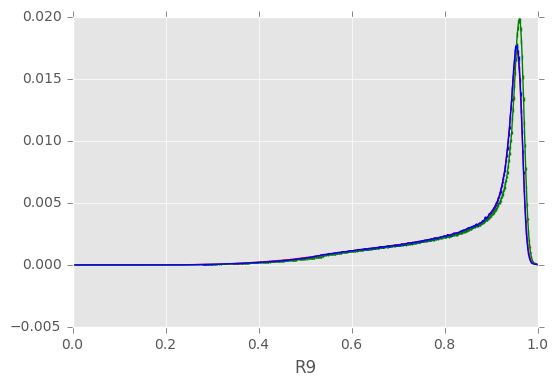

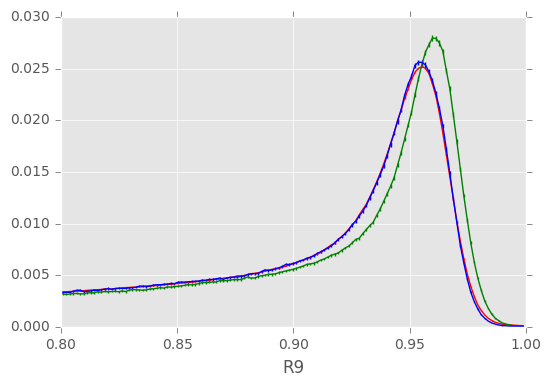

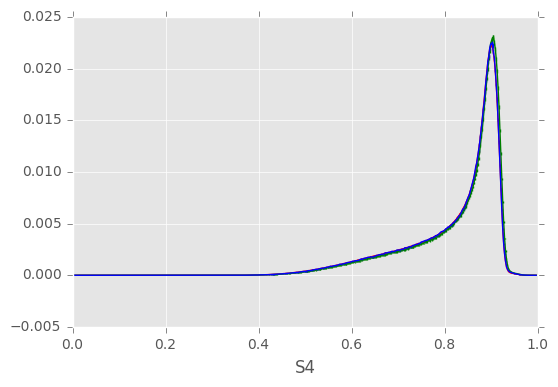

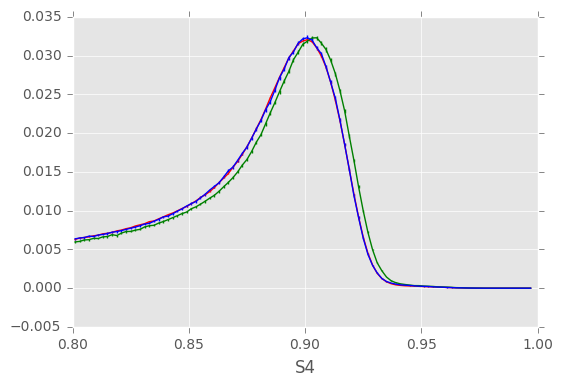

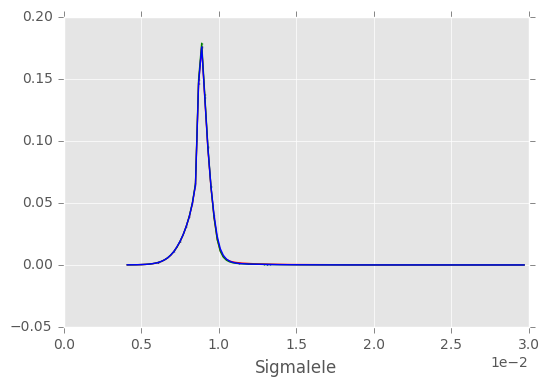

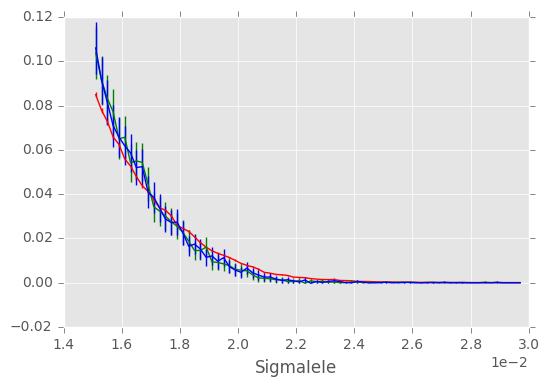

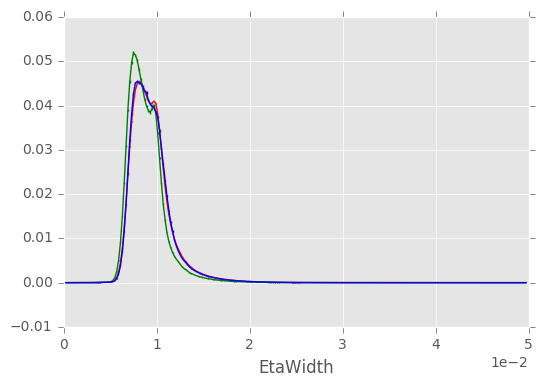

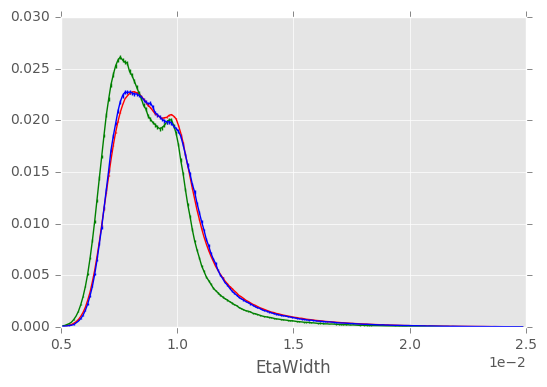

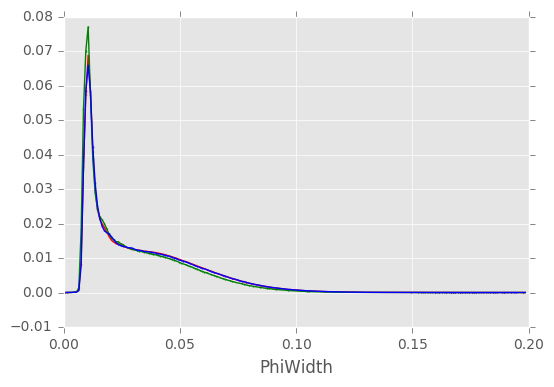

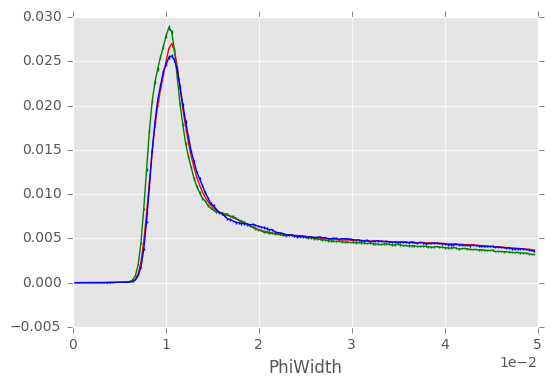

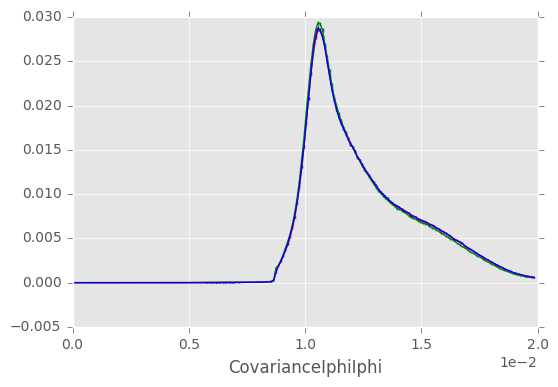

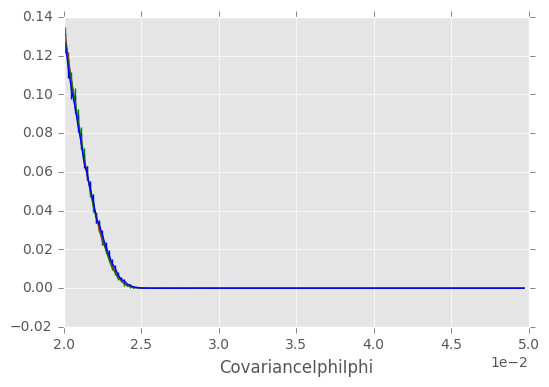

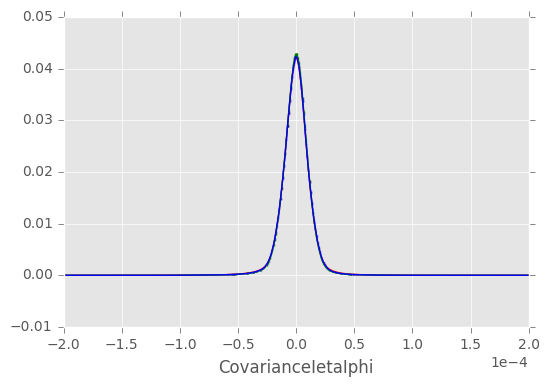

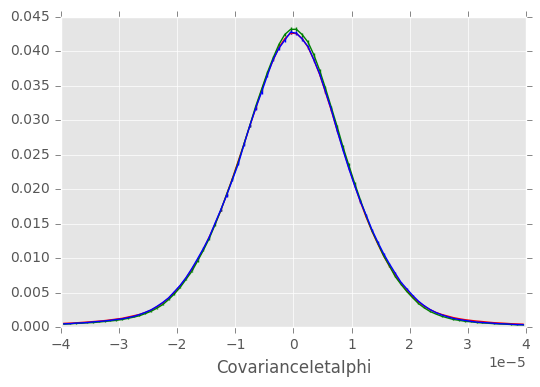

In [7]:
# All periods + integrated + EB
dfm=dfmcEB
dfd=dfdataEB
sec= "EB"
name0="AllPeriods_Integrated_"+sec
section= "section1"
f = open('Plots/'+section+'.tex', "w")
f.write('\part{All Periods Integrated '+sec+"}")
f.close()
print ylist
for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            rv  = np.arange(0.0,1.0,0.0015)
            rv2 = np.arange(0.8,1.0,0.0015)
        else:
            rv  = np.arange(0.0,1.0,0.003)
            rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "S4":
        if sec=="EB":
            rv = np.arange(0.0,1.0,0.002)
            rv2 = np.arange(0.8,1.0,0.002)
        else:
            rv  = np.arange(0.0,1.0,0.003)
            rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "SigmaIeIe":
        if sec=="EB":
            rv = np.arange(0.004,0.03,0.0002)
            rv2 = np.arange(0.015,0.030,0.0002)
        else:
            rv = np.arange(0.014,0.020,0.0002)
            rv2 = np.arange(0.015,0.030,0.0002)
    if yvar == "EtaWidth":
        if sec=="EB":
            rv = np.arange(0.0,0.05,0.0002)
            rv2 = np.arange(0.005,0.025,0.0001)
        else:
            rv = np.arange(0.0,0.05,0.0005)
            rv2 = np.arange(0.005,0.025,0.0002)
    if yvar == "PhiWidth":
        if sec=="EB":
            rv = np.arange(0.0,0.2,0.001)
            rv2 = np.arange(0.0,0.05,0.0003)
        else:
            rv = np.arange(0.0,0.2,0.002)
            rv2 = np.arange(0.0,0.05,0.0006)
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            rv  = np.arange(0.0, 0.02,0.0001)
            rv2 = np.arange(0.02, 0.05,0.0002)
        else:
            rv  = np.arange(0.0, 0.02,0.0002)
            rv2 = np.arange(0.02, 0.05,0.0004)
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            rv = np.arange(-0.0002, 0.0002,0.000001) 
            rv2 = np.arange(-0.00004, 0.00004,0.000001)
        else:
            rv = np.arange(-0.0002, 0.0002,0.00001) 
            rv2 = np.arange(-0.00004, 0.00004,0.000002)
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    plot.plotHistErr(dfd[yvar], rv, Color="r", Weight=dfd["weight"])
    plot.plotHistErr(dfm[yvar], rv,Weight=dfm["weight"], Color="g")  
    plot.plotHistErr(dfm[yvar+"_corr"], rv,Weight=dfm["weight"], Color="b")
    fig = plt.figure(dpi=400)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    name= name0+yvar
    fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
    plot.exportToPdf(name,section)
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    plot.plotHistErr(dfd[yvar], rv2, Color="r", Weight=dfd["weight"])
    plot.plotHistErr(dfm[yvar], rv2,Weight=dfm["weight"], Color="g") 
    plot.plotHistErr(dfm[yvar+"_corr"], rv2,Weight=dfm["weight"], Color="b")
    name= name0+"Zoom"+yvar
    fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
    plot.exportToPdf(name,section)

['R9', 'S4', 'SigmaIeIe', 'EtaWidth', 'PhiWidth', 'CovarianceIphiIphi', 'CovarianceIetaIphi']
plotting  R9
plotting  S4
plotting  SigmaIeIe
plotting  EtaWidth
plotting  PhiWidth
plotting  CovarianceIphiIphi
plotting  CovarianceIetaIphi


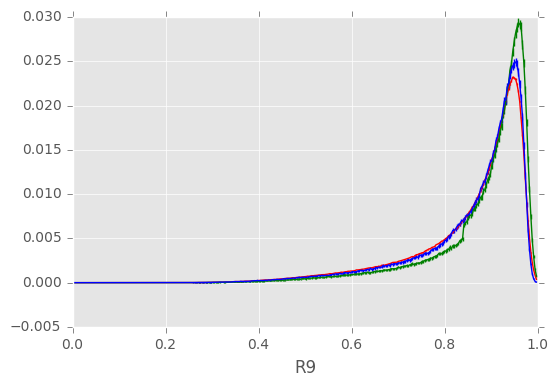

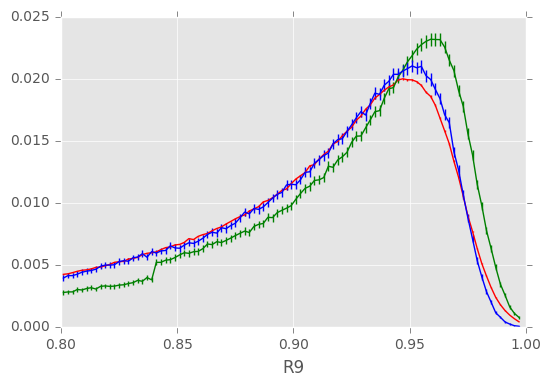

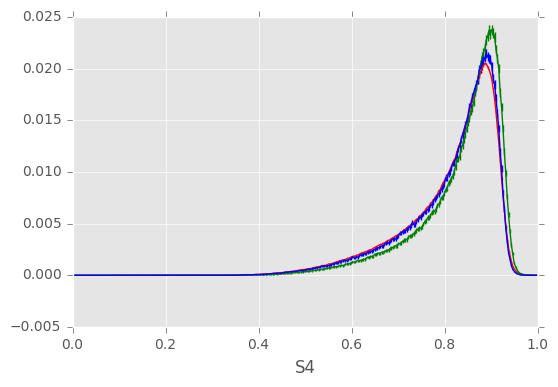

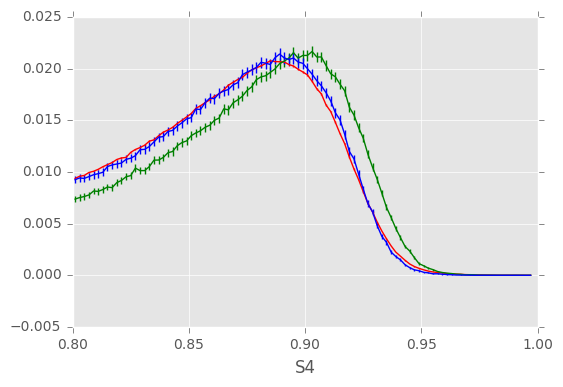

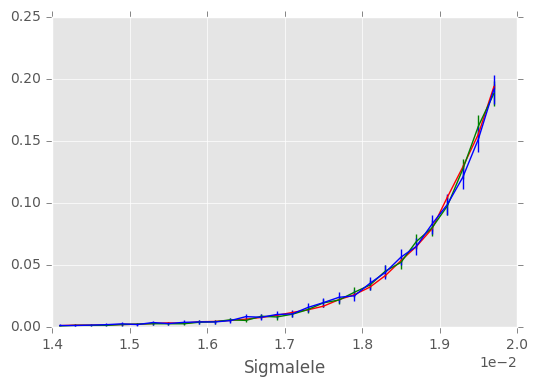

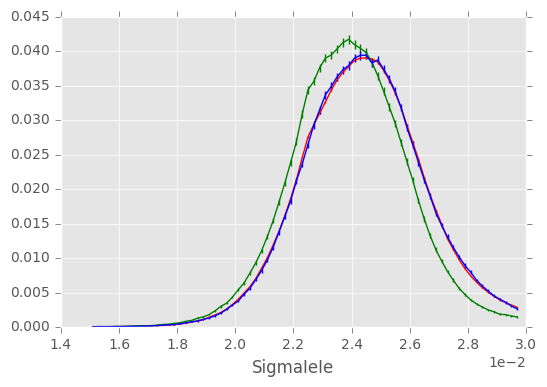

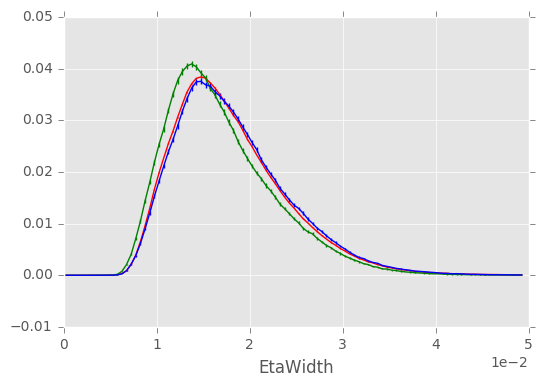

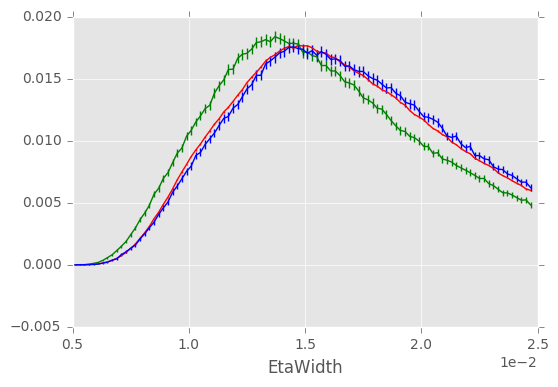

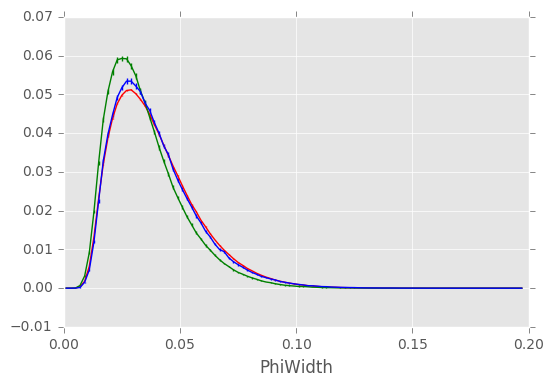

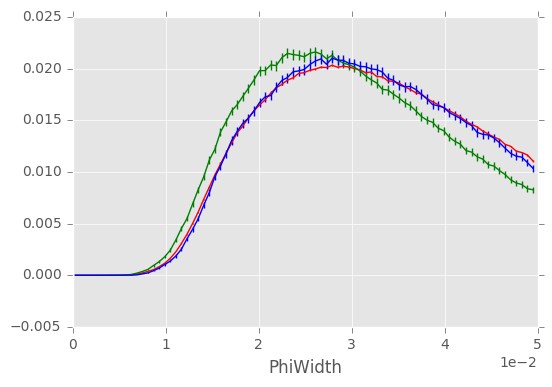

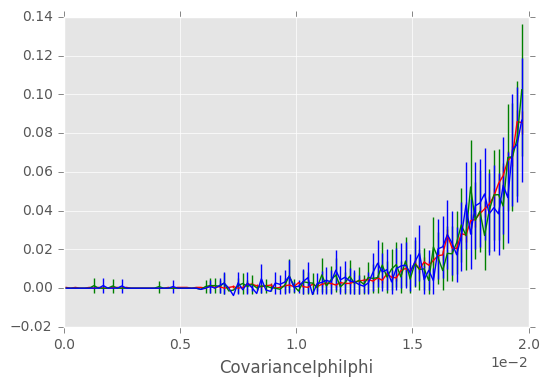

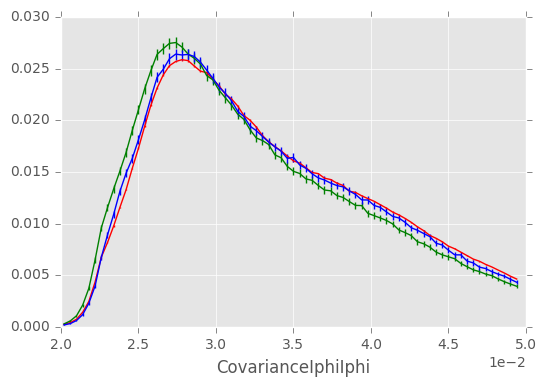

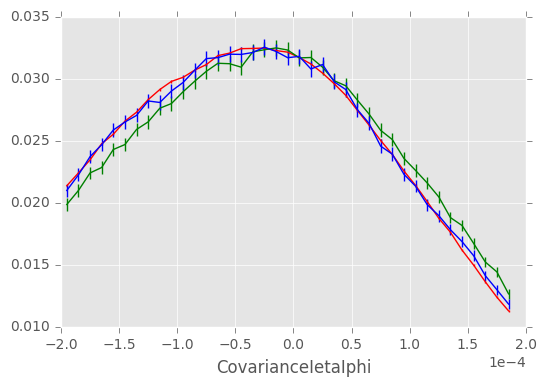

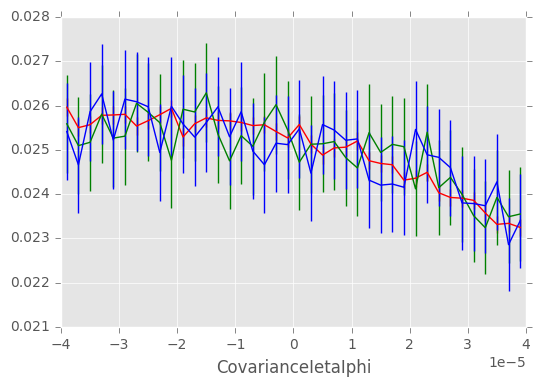

In [8]:
# All periods + integrated + EE
dfm=dfmcEE
dfd=dfdataEE
sec= "EE"
name0="AllPeriods_Integrated_"+sec
section= "section2"
f = open('Plots/'+section+'.tex', "w")
f.write('\part{All Periods Integrated '+sec+"}")
f.close()
print ylist
for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            rv  = np.arange(0.0,1.0,0.0015)
            rv2 = np.arange(0.8,1.0,0.0015)
        else:
            rv  = np.arange(0.0,1.0,0.003)
            rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "S4":
        if sec=="EB":
            rv = np.arange(0.0,1.0,0.002)
            rv2 = np.arange(0.8,1.0,0.002)
        else:
            rv  = np.arange(0.0,1.0,0.003)
            rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "SigmaIeIe":
        if sec=="EB":
            rv = np.arange(0.004,0.03,0.0002)
            rv2 = np.arange(0.015,0.030,0.0002)
        else:
            rv = np.arange(0.014,0.020,0.0002)
            rv2 = np.arange(0.015,0.030,0.0002)
    if yvar == "EtaWidth":
        if sec=="EB":
            rv = np.arange(0.0,0.05,0.0002)
            rv2 = np.arange(0.005,0.025,0.0001)
        else:
            rv = np.arange(0.0,0.05,0.0005)
            rv2 = np.arange(0.005,0.025,0.0002)
    if yvar == "PhiWidth":
        if sec=="EB":
            rv = np.arange(0.0,0.2,0.001)
            rv2 = np.arange(0.0,0.05,0.0003)
        else:
            rv = np.arange(0.0,0.2,0.002)
            rv2 = np.arange(0.0,0.05,0.0006)
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            rv  = np.arange(0.0, 0.02,0.0001)
            rv2 = np.arange(0.02, 0.05,0.0002)
        else:
            rv  = np.arange(0.0, 0.02,0.0002)
            rv2 = np.arange(0.02, 0.05,0.0004)
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            rv = np.arange(-0.0002, 0.0002,0.000001) 
            rv2 = np.arange(-0.00004, 0.00004,0.000001)
        else:
            rv = np.arange(-0.0002, 0.0002,0.00001) 
            rv2 = np.arange(-0.00004, 0.00004,0.000002)
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    plot.plotHistErr(dfd[yvar], rv, Color="r", Weight=dfd["weight"])
    plot.plotHistErr(dfm[yvar], rv,Weight=dfm["weight"], Color="g")  
    plot.plotHistErr(dfm[yvar+"_corr"], rv,Weight=dfm["weight"], Color="b")
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    name= name0+yvar
    fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
    plot.exportToPdf(name,section)
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    plot.plotHistErr(dfd[yvar], rv2, Color="r", Weight=dfd["weight"])
    plot.plotHistErr(dfm[yvar], rv2,Weight=dfm["weight"], Color="g") 
    plot.plotHistErr(dfm[yvar+"_corr"], rv2,Weight=dfm["weight"], Color="b")
    name= name0+"Zoom"+yvar
    fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
    plot.exportToPdf(name,section)

plotting  R9
plotting  S4
plotting  SigmaIeIe
plotting  EtaWidth
plotting  PhiWidth
plotting  CovarianceIphiIphi
plotting  CovarianceIetaIphi


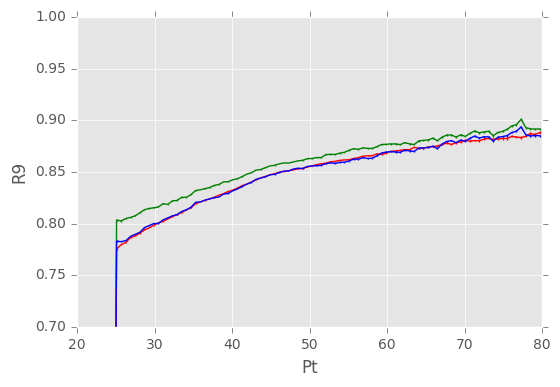

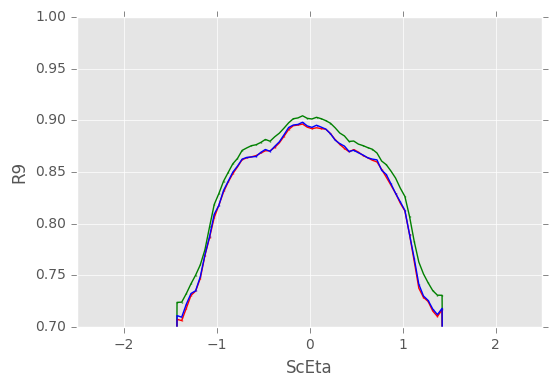

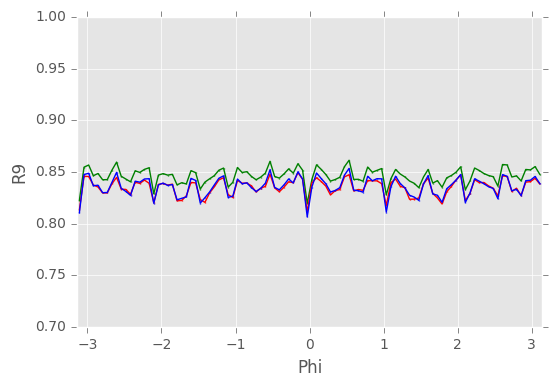

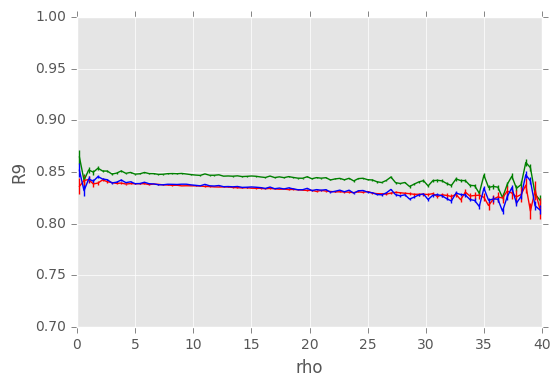

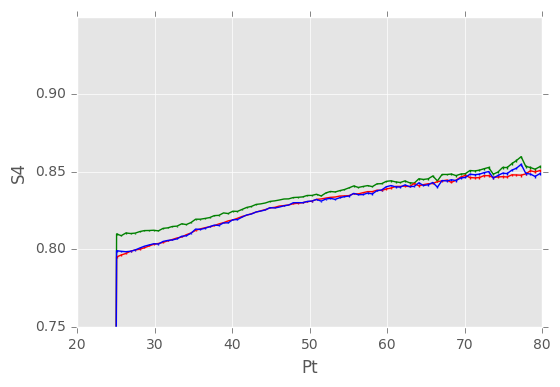

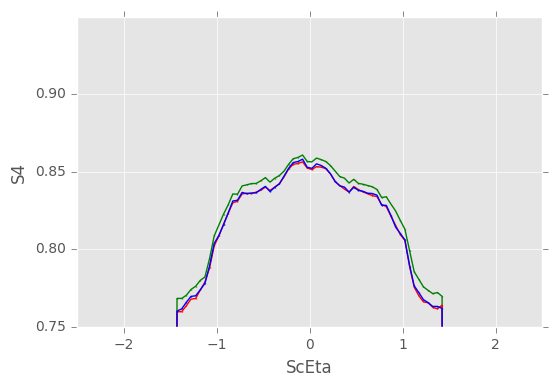

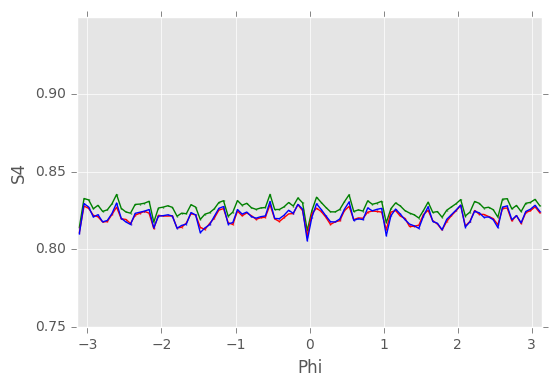

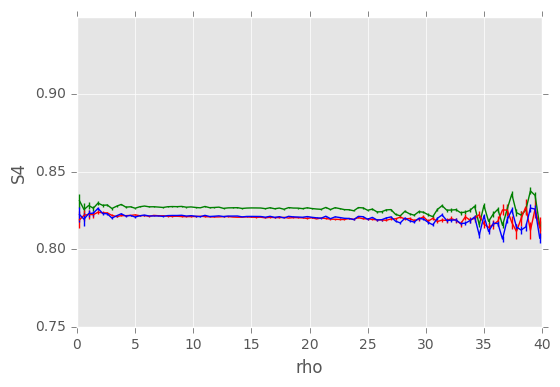

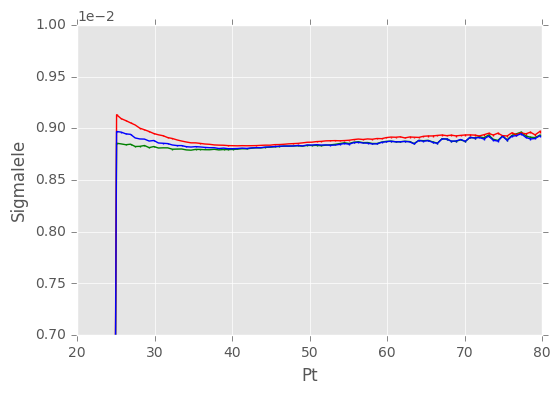

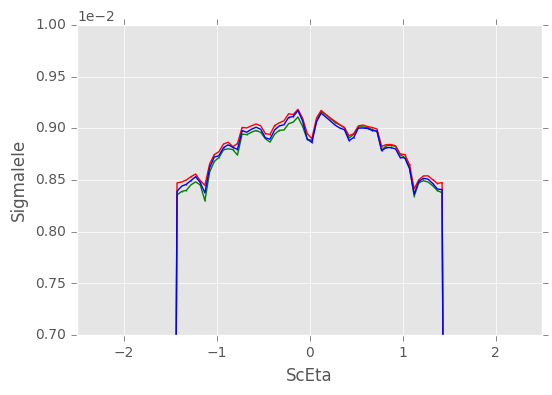

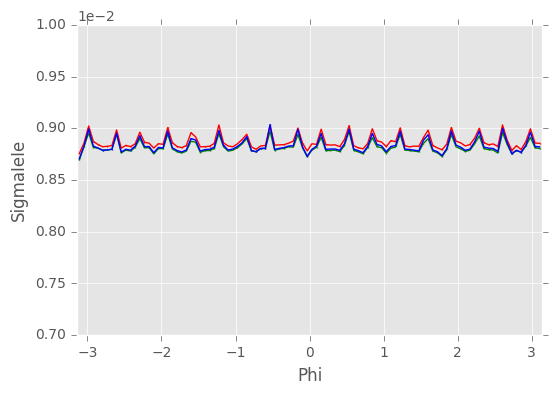

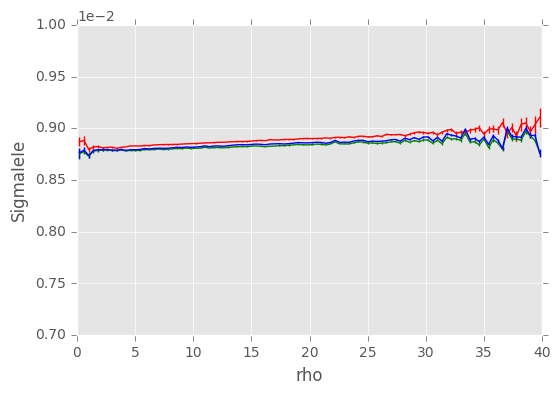

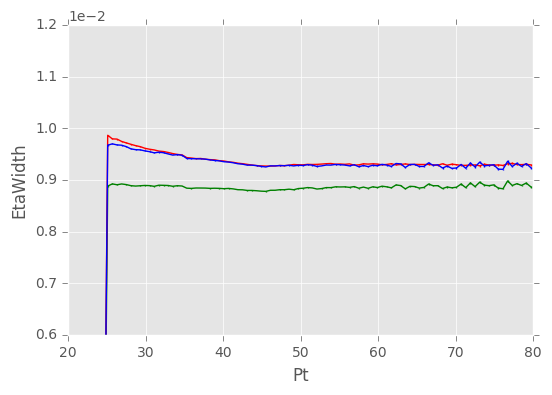

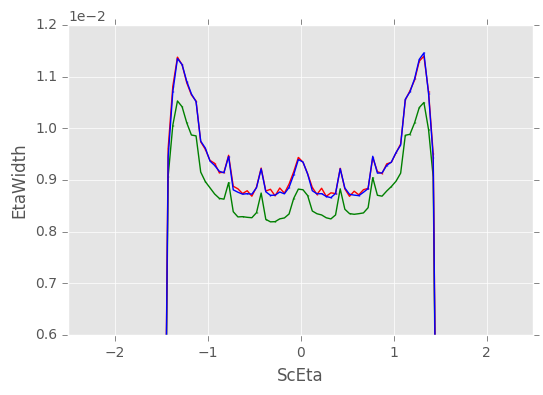

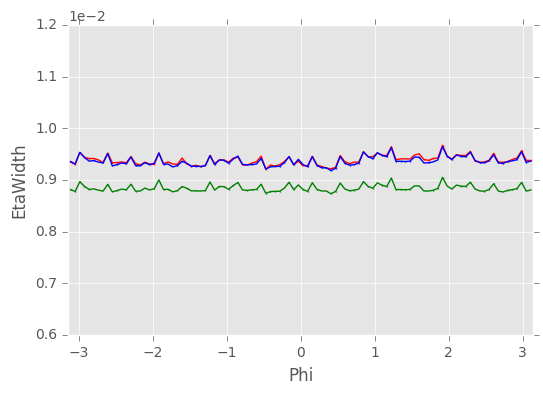

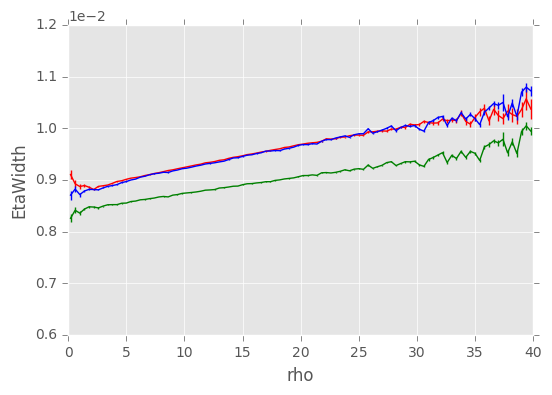

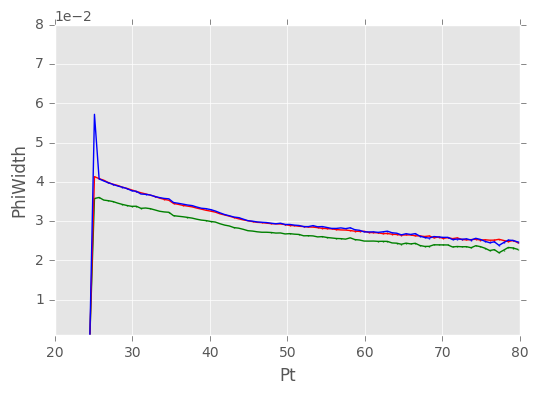

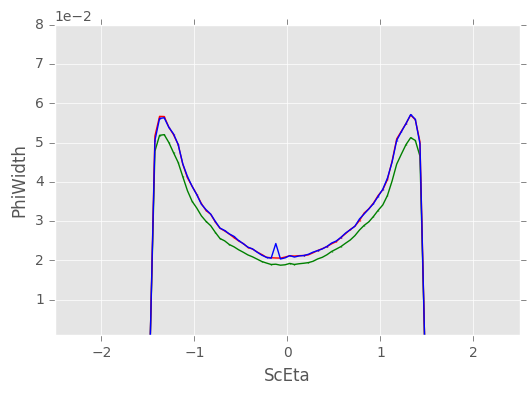

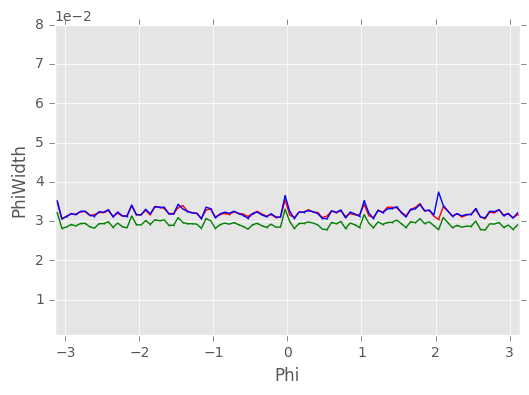

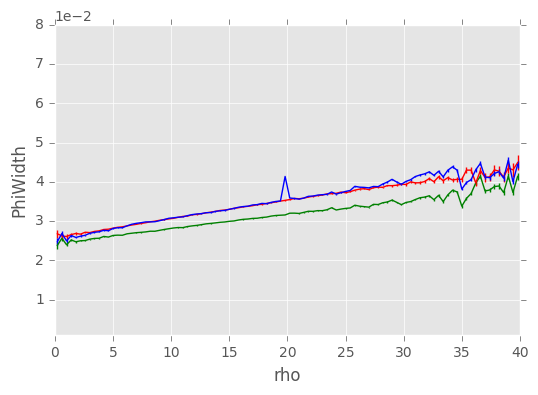

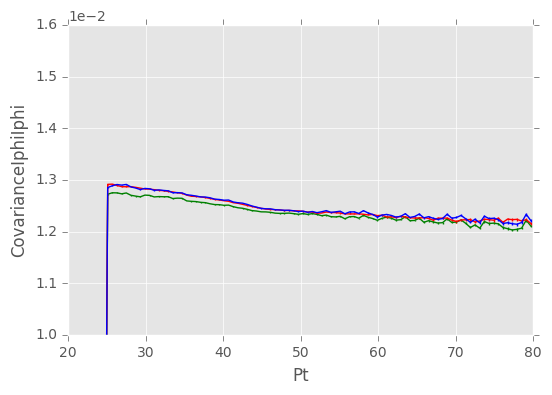

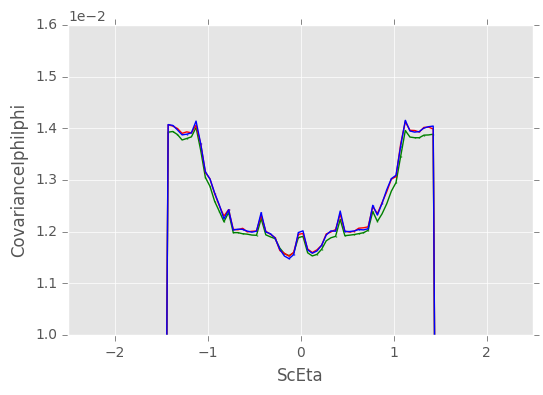

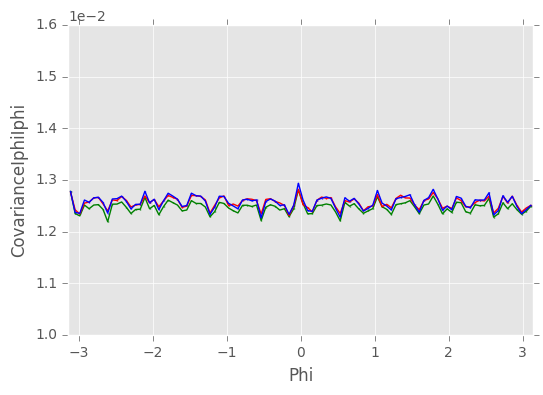

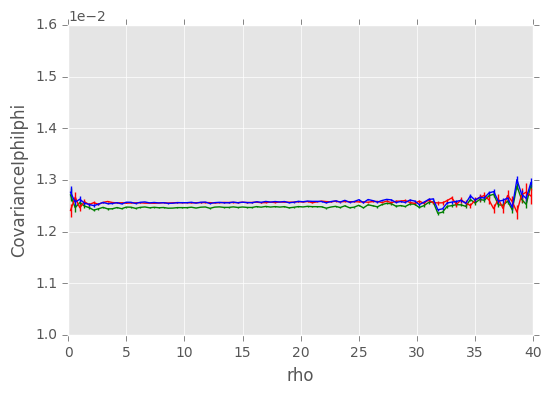

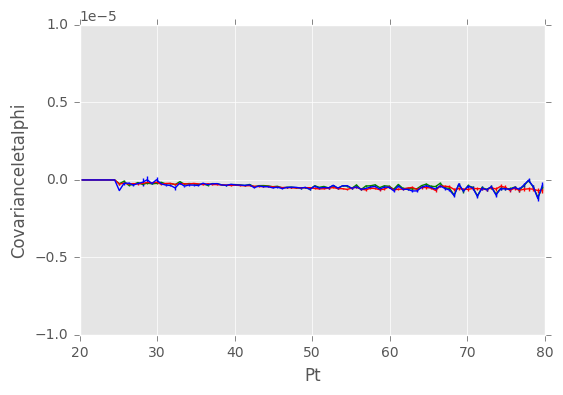

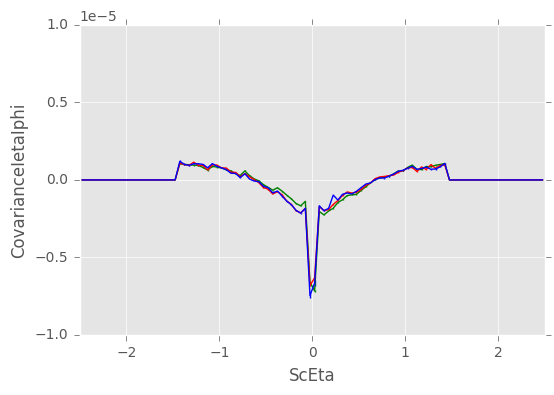

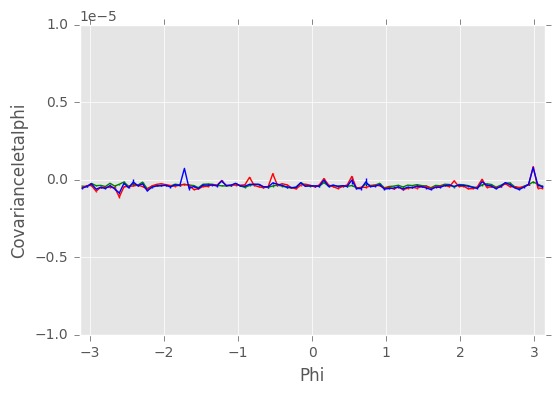

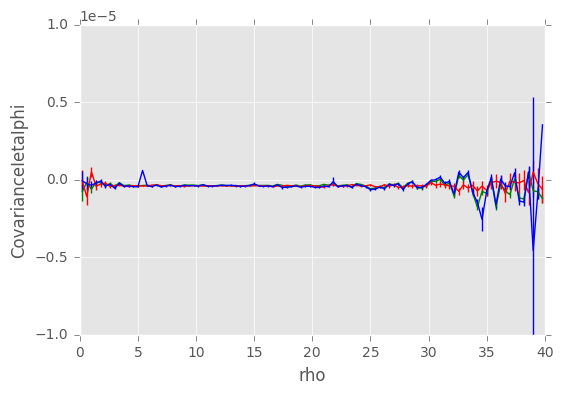

In [9]:
# split profiles in EB/EE (profile meaningless when the values of the variable are very different in the two cases)
dfm=dfmcEB
dfd=dfdataEB
sec= "EB"
name0="AllPeriods_Profiles_"+sec
section= "section3"
f = open('Plots/'+section+'.tex', "w")
f.write('\part{All Periods Profiles '+sec+"}")
f.close()

for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
        else: 
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
    if yvar == "S4":
        if sec=="EB":
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
        else: 
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
    if yvar == "SigmaIeIe":
        if sec=="EB":
            minY, maxY = 0.007, 0.01
            ymin,ymax=0.0083,0.0092
        else: 
            minY, maxY = 0.022, 0.028
            ymin,ymax=0.023,0.026
    if yvar == "EtaWidth":
        if sec=="EB":
            minY, maxY = 0.006, 0.012
            ymin,ymax=0.008,0.01
        else: 
            minY, maxY = 0.005, 0.030
            ymin,ymax=0.005,0.03
    if yvar == "PhiWidth":
        if sec=="EB": 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.01,0.05
        else: 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.025,0.05
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            minY, maxY = 0.010, 0.016
            ymin,ymax=0.0115,0.0135
        else: 
            minY, maxY = 0.02, 0.040
            ymin,ymax=0.028,0.036
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            minY, maxY = -0.00001, 0.00001
            ymin,ymax=-0.000003,0.000003
        else: 
            minY, maxY = -0.0002, 0.0002
            ymin,ymax=-0.00003,0.00003
    for xvar in X:
        if xvar=="ScEta":
            xmin,xmax= -2.5,2.5
        if xvar=="Pt":
            xmin,xmax=20.0,80.0
        if xvar=='rho':
            xmin,xmax=0.,40.
        if xvar=="Phi":
            xmin,xmax=-3.14,3.14
            
        fig = plt.figure(dpi=400)
        ax = fig.add_subplot(111)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        ax.set_xlabel(xvar)
        ax.set_ylabel(yvar)
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(minY,maxY)
        plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
        plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
        plot.Profile(dfm[xvar]  , dfm[yvar+'_corr']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        name= name0+yvar+"vs"+xvar
        fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
        plot.exportToPdf(name,section)

plotting  R9
plotting  S4
plotting  SigmaIeIe
plotting  EtaWidth
plotting  PhiWidth
plotting  CovarianceIphiIphi
plotting  CovarianceIetaIphi


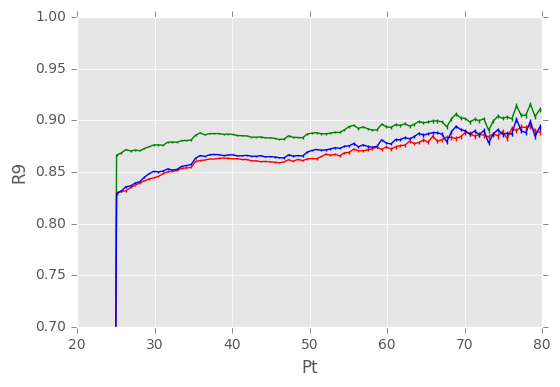

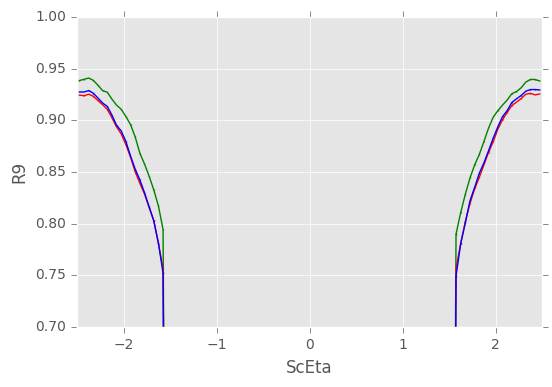

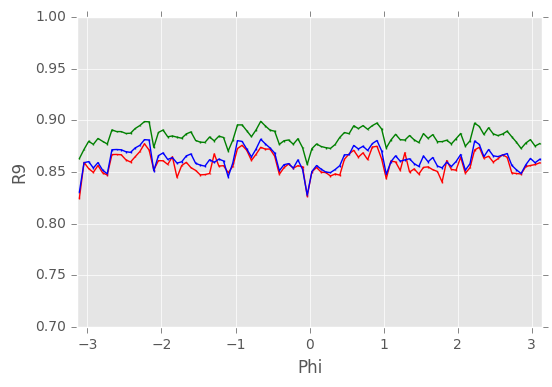

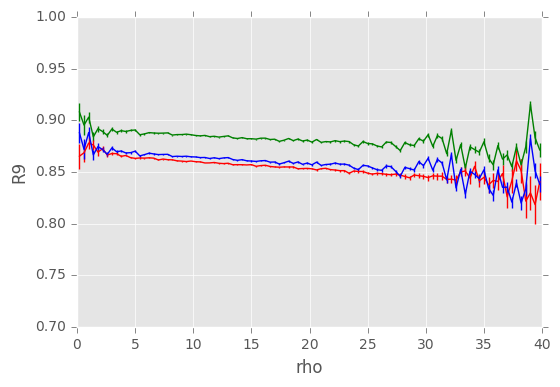

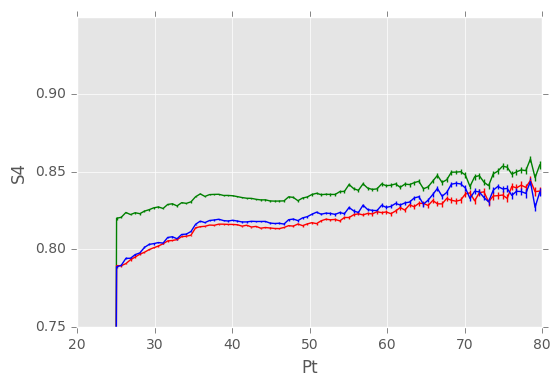

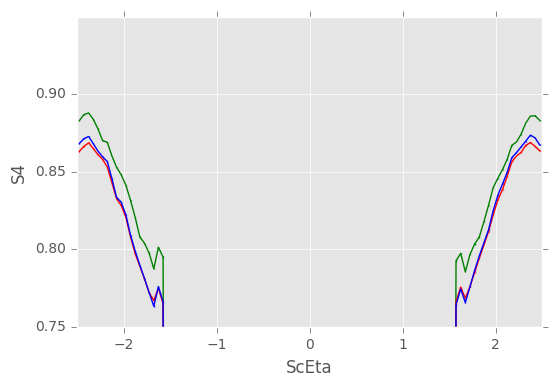

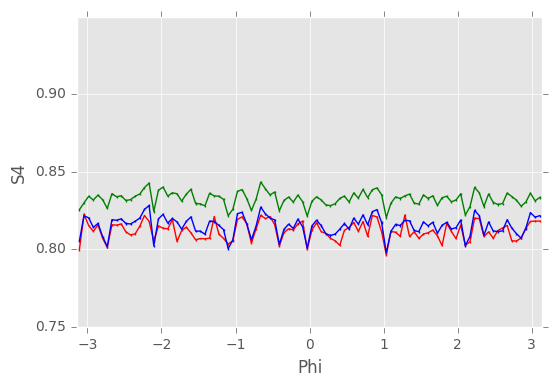

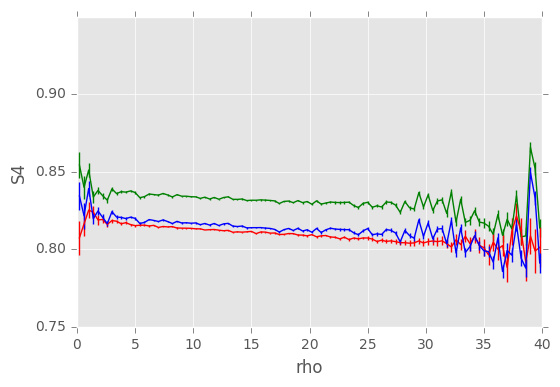

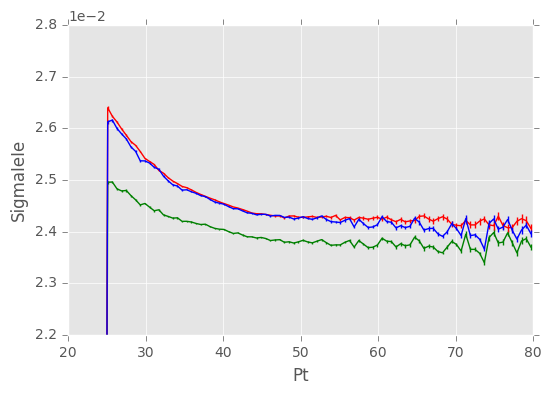

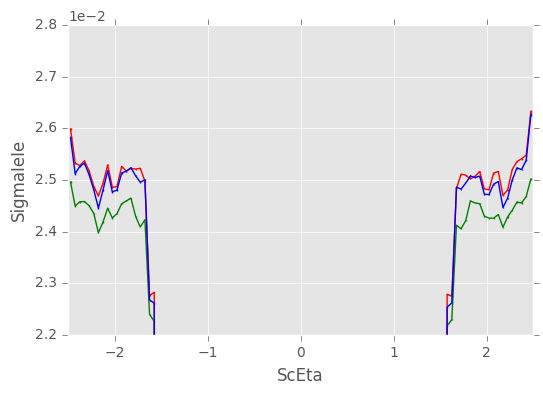

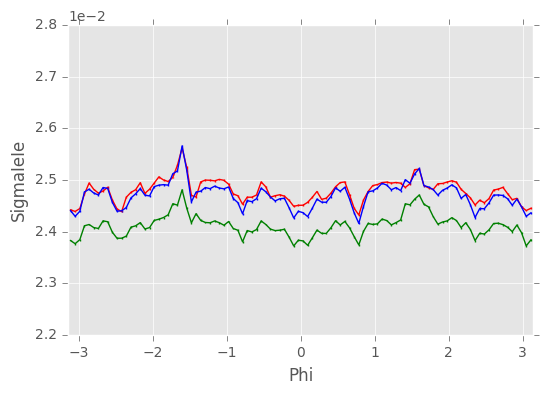

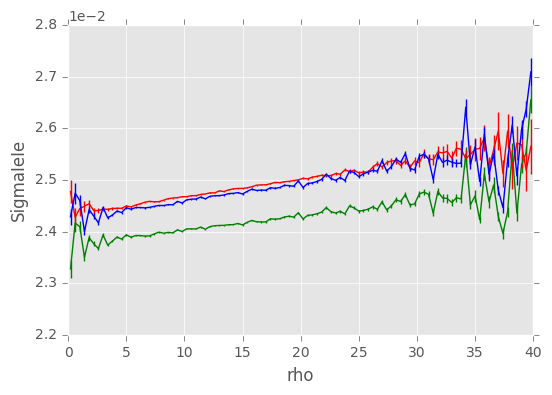

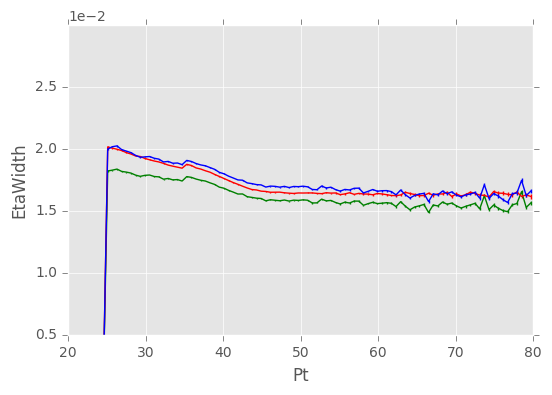

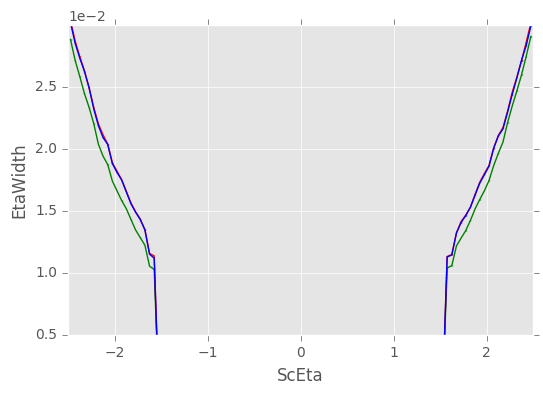

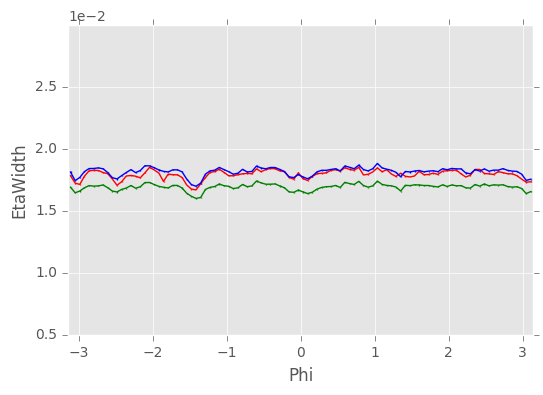

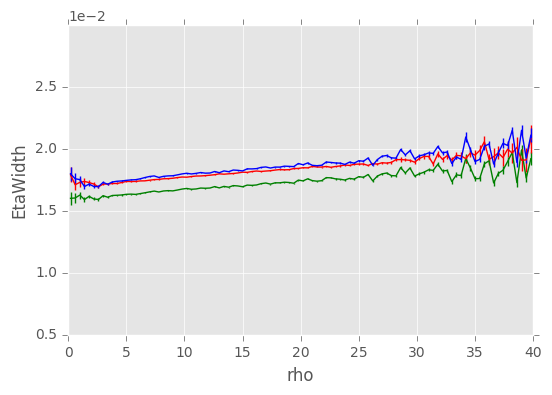

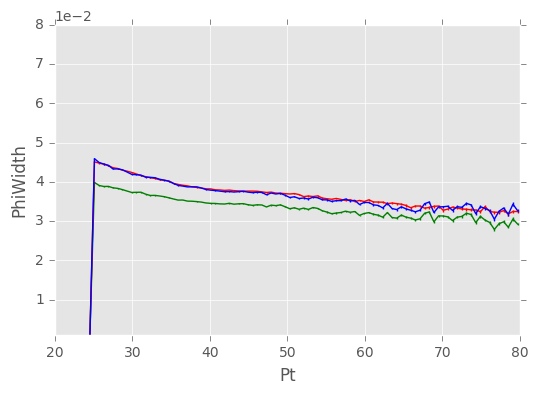

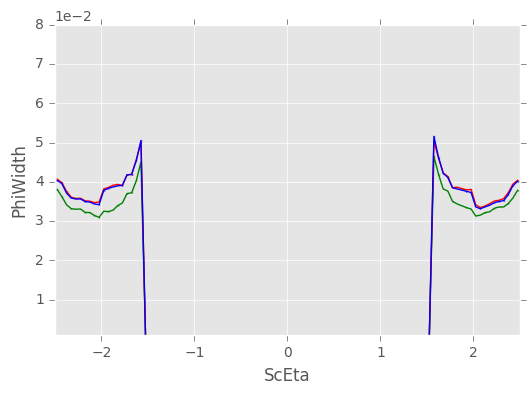

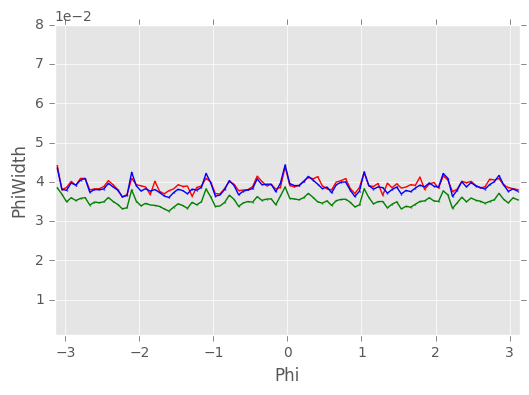

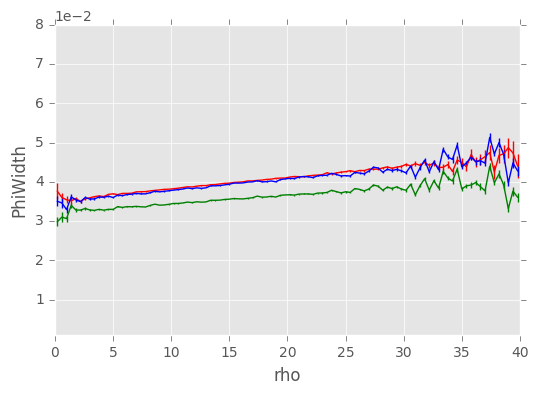

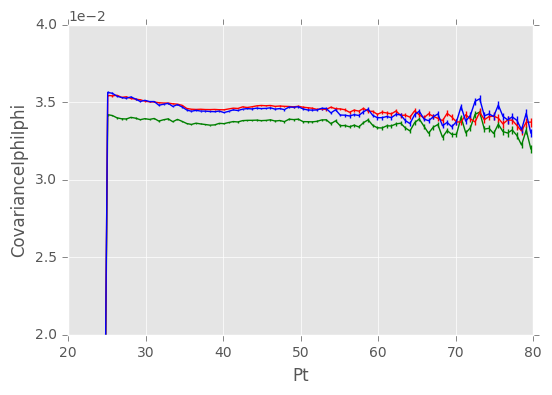

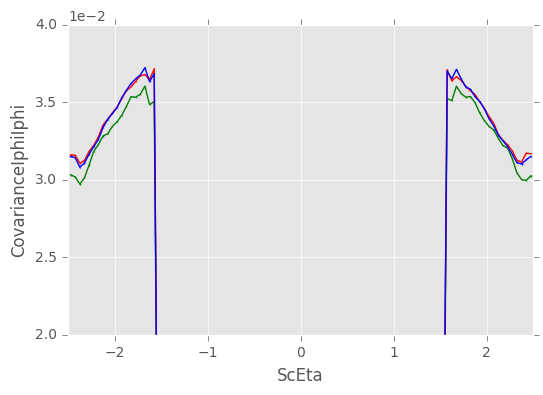

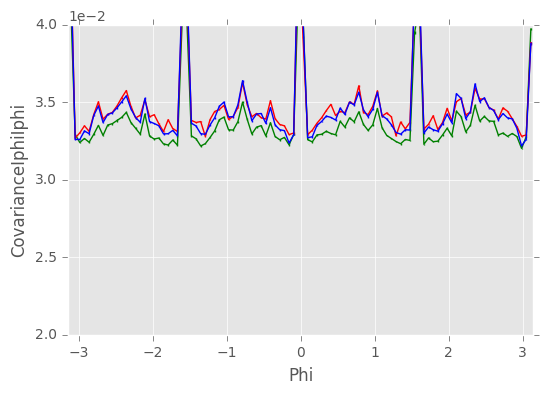

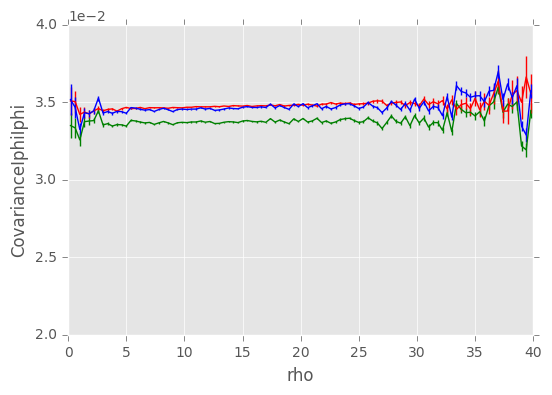

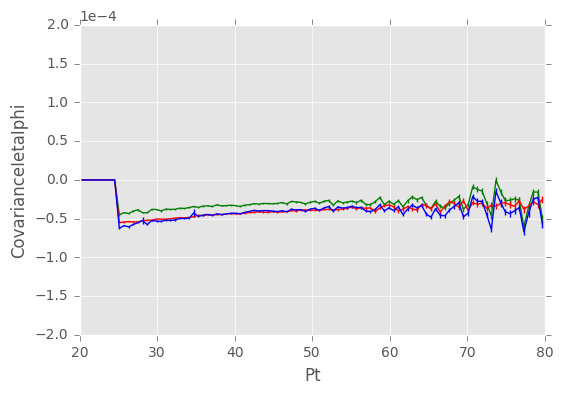

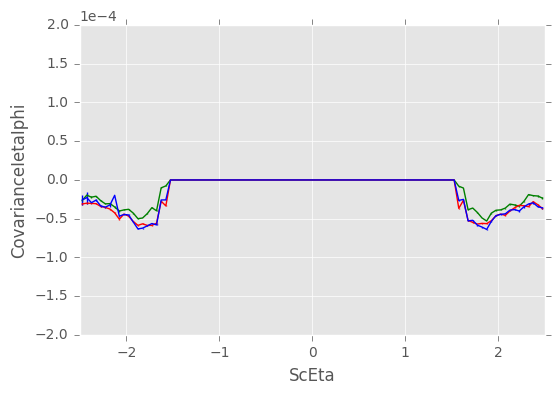

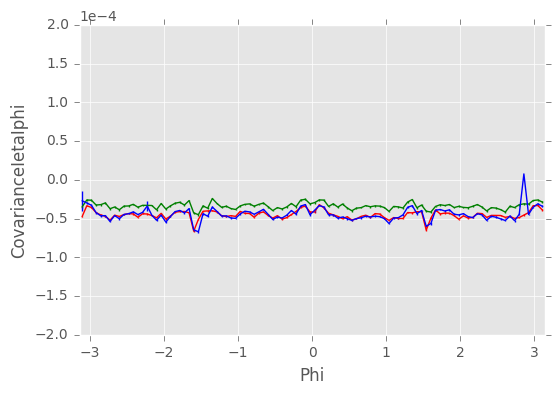

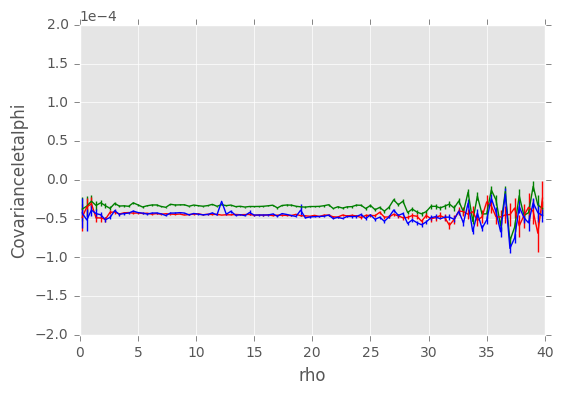

In [10]:
# split profiles in EB/EE (profile meaningless when the values of the variable are very different in the two cases)
dfm=dfmcEE
dfd=dfdataEE
sec= "EE"
name0="AllPeriods_Profiles_"+sec
section= "section4"
f = open('Plots/'+section+'.tex', "w")
f.write('\part{All Periods Profiles '+sec+"}")
f.close()

for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
        else: 
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
    if yvar == "S4":
        if sec=="EB":
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
        else: 
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
    if yvar == "SigmaIeIe":
        if sec=="EB":
            minY, maxY = 0.007, 0.015
            ymin,ymax=0.0083,0.0092
        else: 
            minY, maxY = 0.022, 0.028
            ymin,ymax=0.023,0.026
    if yvar == "EtaWidth":
        if sec=="EB":
            minY, maxY = 0.006, 0.012
            ymin,ymax=0.008,0.01
        else: 
            minY, maxY = 0.005, 0.030
            ymin,ymax=0.005,0.03
    if yvar == "PhiWidth":
        if sec=="EB": 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.01,0.05
        else: 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.025,0.05
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            minY, maxY = 0.010, 0.016
            ymin,ymax=0.0115,0.0135
        else: 
            minY, maxY = 0.02, 0.040
            ymin,ymax=0.028,0.036
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            minY, maxY = -0.00001, 0.00001
            ymin,ymax=-0.000003,0.000003
        else: 
            minY, maxY = -0.0002, 0.0002
            ymin,ymax=-0.00003,0.00003
    for xvar in X:
        if xvar=="ScEta":
            xmin,xmax= -2.5,2.5
        if xvar=="Pt":
            xmin,xmax=20.0,80.0
        if xvar=='rho':
            xmin,xmax=0.,40.
        if xvar=="Phi":
            xmin,xmax=-3.14,3.14
            
        fig = plt.figure(dpi=400)
        ax = fig.add_subplot(111)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        ax.set_xlabel(xvar)
        ax.set_ylabel(yvar)
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(minY,maxY)
        plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
        plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
        plot.Profile(dfm[xvar]  , dfm[yvar+'_corr']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        name= name0+yvar+"vs"+xvar
        fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
        plot.exportToPdf(name,section)

In [11]:
showerShapes = ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4',"CovarianceIphiIphi"]

mvas = [ ("moriondPhoID",dict(correct=[], rhoSubtraction=True) ), 
         ("moriondPhoIDcorrShowerShapes",dict(correct=showerShapes, rhoSubtraction=True) ) ]# ,
##("moriondPhoIDcorrIso",dict(correct=['PhoIso03'],rhoSubtraction=True)),
#("moriondPhoIDcorrAll",dict(correct=showerShapes+['PhoIso03'], rhoSubtraction=True))]

weights = ("./phoIDMVAweights/HggPhoId_barrel_Moriond2017_wRhoRew.weights.xml","./phoIDMVAweights/HggPhoId_endcap_Moriond2017_wRhoRew.weights.xml")

In [12]:
n_jobs=30
dfmc1= qr_mc1.getDF() 
dfmc2= qr_mc2.getDF() 
frame2 = [dfmc1, dfmc2] 
data2 = pd.concat(frame2)
qr_mc= quantileRegression("mc")
qr_mc.df = data2.sample(frac=1).reset_index(drop=True)
qr_data.df= qr_data.df.sample(frac=0.5).reset_index(drop=True)
%time qr_data.computeIdMvas( mvas[:1],  weights, n_jobs=n_jobs )
%time qr_mc.computeIdMvas( mvas, weights, n_jobs=n_jobs )
dfmc = qr_mc.getDF()
dfdata = qr_data.getDF()

Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:  3.6min
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:  3.6min remaining: 52.3min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:  5.6min remaining: 38.1min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:  5.9min remaining: 24.6min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:  6.2min remaining: 17.7min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:  6.3min remaining: 13.2min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  6.4min remaining: 10.1min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  6.4min remaining:  7.8min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  6.4min remaining:  6.0min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  6.6min remaining:  4.7min
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  6.6min remaining:  3.6min
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  6.6min remaining:  2.7min
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 4.81 s, sys: 2.25 s, total: 7.06 s
Wall time: 6min 53s
Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:  5.7min
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:  5.7min remaining: 83.2min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:  6.1min remaining: 41.1min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:  6.8min remaining: 28.2min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:  6.8min remaining: 19.5min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:  6.9min remaining: 14.6min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  7.1min remaining: 11.2min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  7.2min remaining:  8.7min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  7.2min remaining:  6.8min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  7.4min remaining:  5.4min
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  7.5min remaining:  4.1min
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  7.6min remaining:  3.1min
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing moriondPhoIDcorrShowerShapes, correcting {'rhoSubtraction': True, 'correct': ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4', 'CovarianceIphiIphi']}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:  8.8min
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:  8.8min remaining: 127.2min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:  8.9min remaining: 59.9min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:  8.9min remaining: 37.3min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:  9.0min remaining: 26.0min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:  9.1min remaining: 19.0min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  9.1min remaining: 14.4min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  9.1min remaining: 11.1min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  9.2min remaining:  8.6min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  9.2min remaining:  6.6min
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  9.2min remaining:  5.1min
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  9.3min remaining:  3.8min
[Parallel(n_jobs=30)]: Done  24 out of  31 | e

CPU times: user 14 s, sys: 7.83 s, total: 21.8 s
Wall time: 17min 21s


In [13]:
dfEB   = dfdata  .query('(-1.444 < ScEta and ScEta <1.444) and (mass > 70 and mass < 110)  and (ChIso03 < 5)') 
dfEE   = dfdata  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110)  and (ChIso03 < 5)')# and (R9>0.8)')
dfmcEB   = dfmc  .query('(-1.444 < ScEta and ScEta <1.444)  and (mass > 70 and mass < 110) and (ChIso03 < 5)') 
dfmcEE   = dfmc  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110)  and (ChIso03 < 5)')# and (R9>0.8)')

Plotting.py:51: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if axes == None: axes = fig.axes


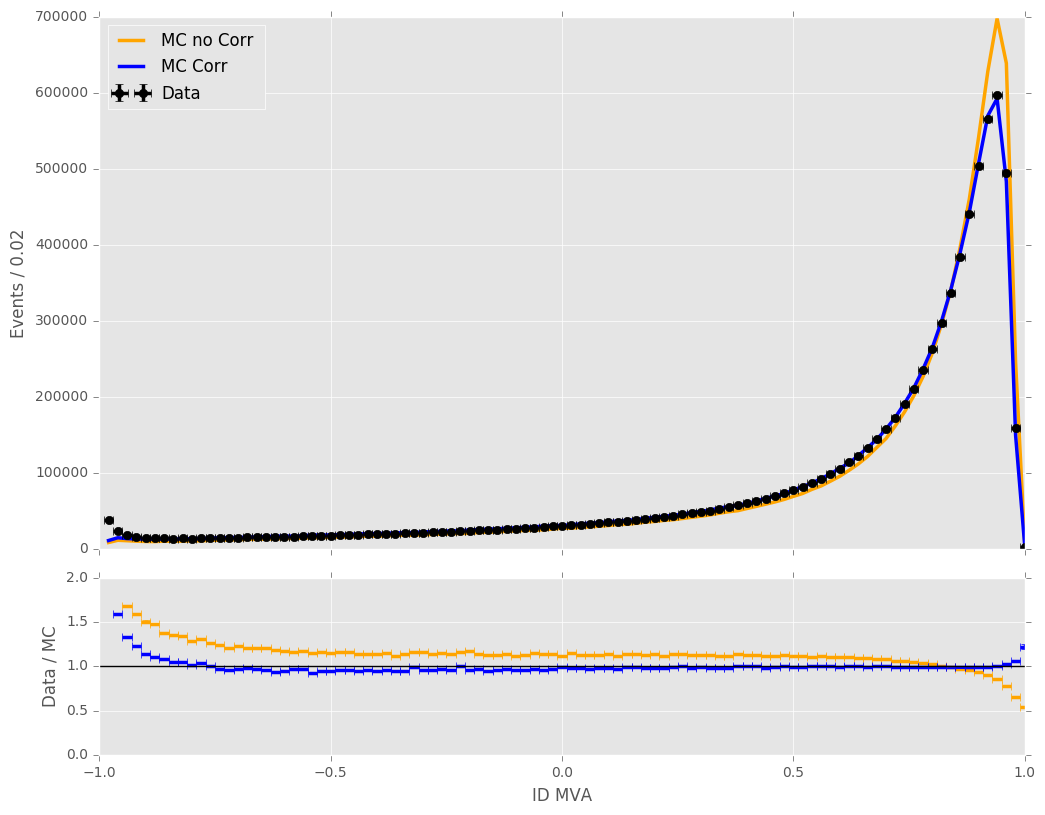

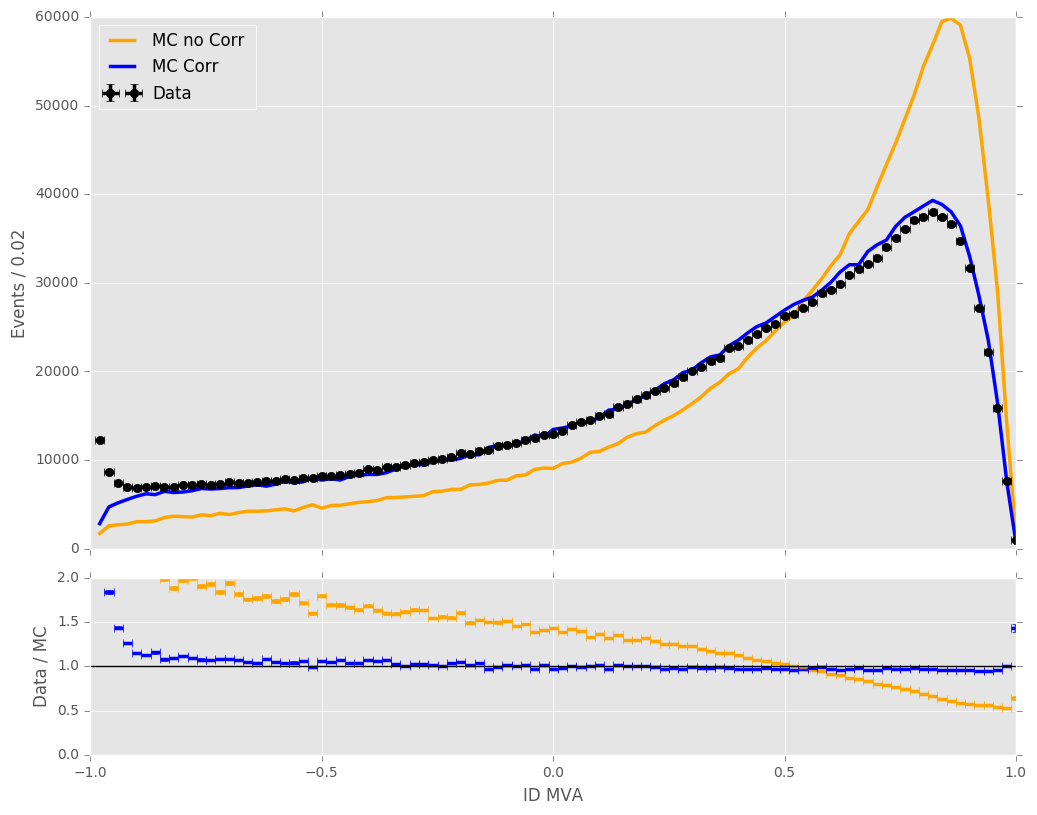

In [14]:
bins = np.linspace(-1,1,101)
var = 'moriondPhoID'
mclabels = [ '', 'corrShowerShapes']
mcstyles = [ dict(label='MC no Corr ',color='orange'),
             dict(label='MC Corr ',color='blue'), 
           ]

for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = plot.data_mc(dfs[0],dfs[1],var,bins,weight="weight",mclabels=mclabels)
    plot.draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8))
  

In [ ]:
import matplotlib as mpl
from functools import reduce

def set_style(obj,color):
    obj.set_color(color)
    obj.set_linewidth(2)
    
def do_boxplot(df,column,by,color,ax):
    objs = df.query('%s > -0.8' % column).boxplot(column=column,by=by, return_type='dict', ax=ax)
    map(lambda x: set_style(x,color), reduce(lambda x,y: x+y, objs[column].values()))

def do_var_boxplot(df,cut,column,by,color,ax):
    objs = df.query(cut).boxplot(column=column,by=by, return_type='dict', ax=ax)
    map(lambda x: set_style(x,color), reduce(lambda x,y: x+y, objs[column].values()))

In [ ]:
binsEta = np.linspace(-2.5,2.5, 21)

dfmc['etaBin'] = pd.cut(dfmc.ScEta,binsEta)
dfdata['etaBin'] = pd.cut(dfdata.ScEta,binsEta)

binsPt = np.linspace(20,80,21)

dfmcEB['ptBin'] = pd.cut(dfmcEB.Pt,binsPt)
dfEB['ptBin'] = pd.cut(dfEB.Pt,binsPt)

dfmcEE['ptBin'] = pd.cut(dfmcEE.Pt,binsPt)
dfEE['ptBin'] = pd.cut(dfEE.Pt,binsPt)

In [ ]:
dfm=dfmcEE.query("moriondPhoID>-0.8")
dfd=dfEE.query("moriondPhoID>-0.8")
xvar="Pt"
yvar="moriondPhoID"
xmin,xmax=20.0,80.0
minY=-1
maxY=1
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax.set_xlabel(xvar)
ax.set_ylabel(yvar)
ax.set_title("EE")
ax.set_xlim(xmin,xmax)
ax.set_ylim(minY,maxY)
plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
plot.Profile(dfm[xvar]  , dfm[yvar+'corrShowerShapes']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])

dfm=dfmcEB
dfd=dfEB
xvar="Pt"
yvar="moriondPhoID"
xmin,xmax=20.0,80.0
minY=-1
maxY=1
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax.set_xlabel(xvar)
ax.set_ylabel(yvar)
ax.set_title("EB")
ax.set_xlim(xmin,xmax)
ax.set_ylim(minY,maxY)
plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
plot.Profile(dfm[xvar]  , dfm[yvar+'corrShowerShapes']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])

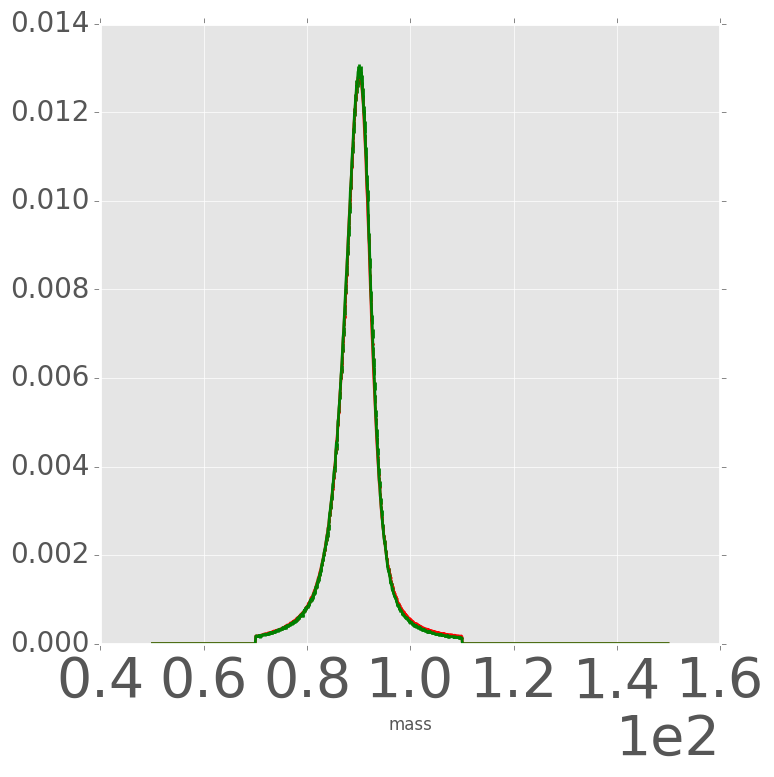

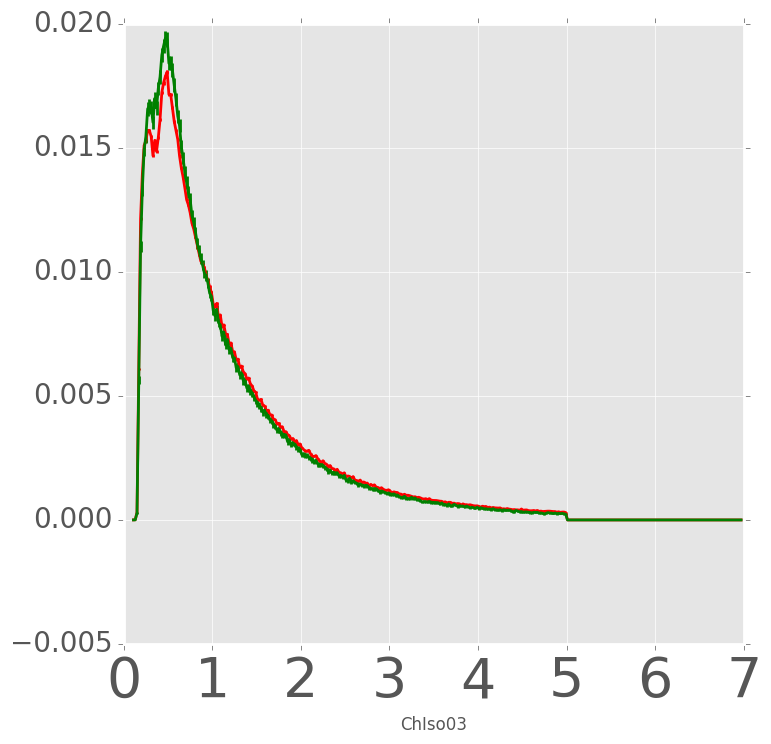

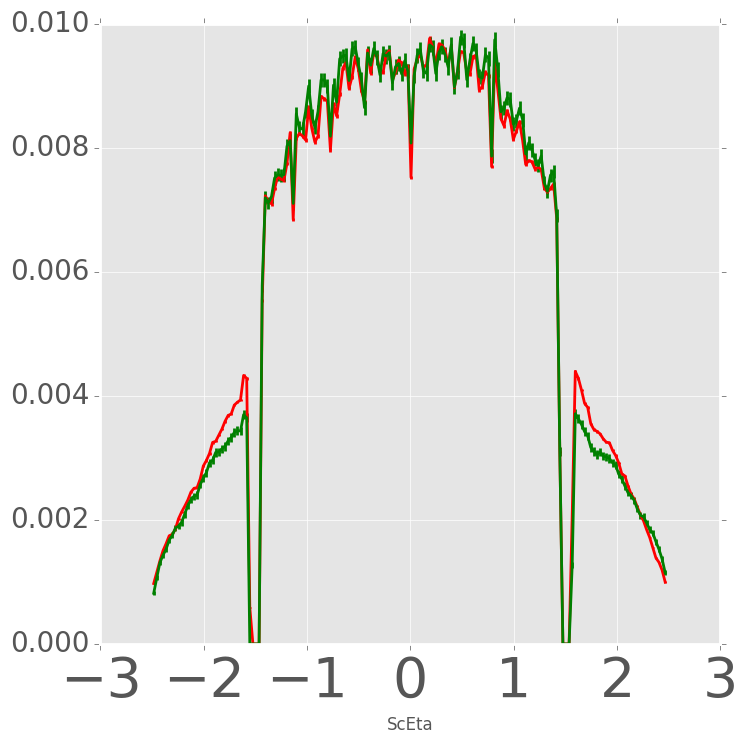

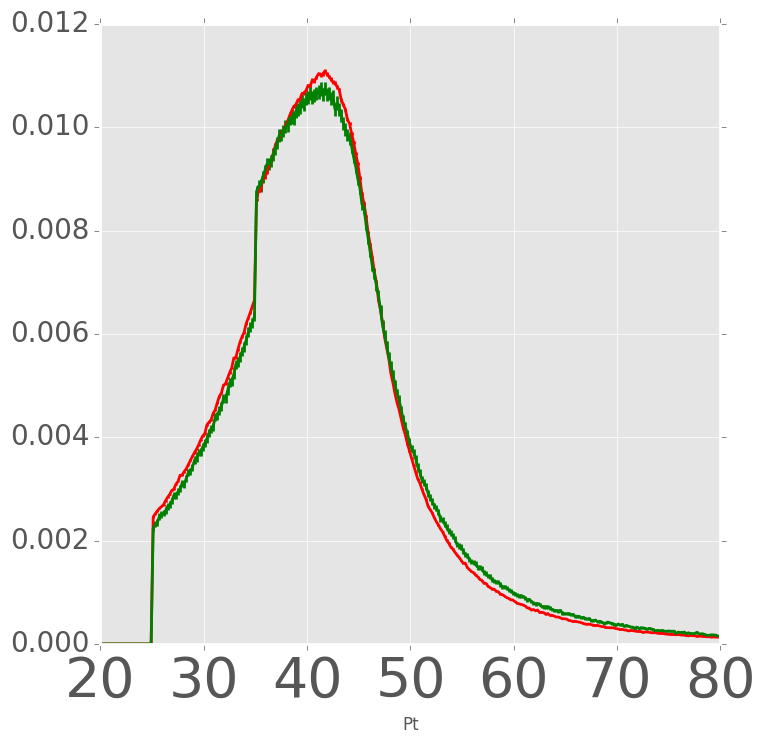

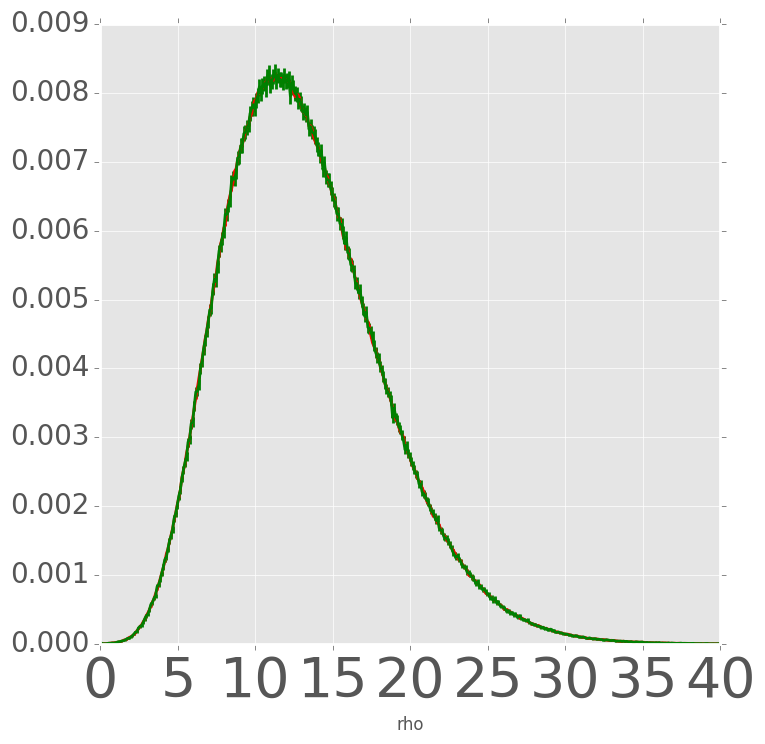

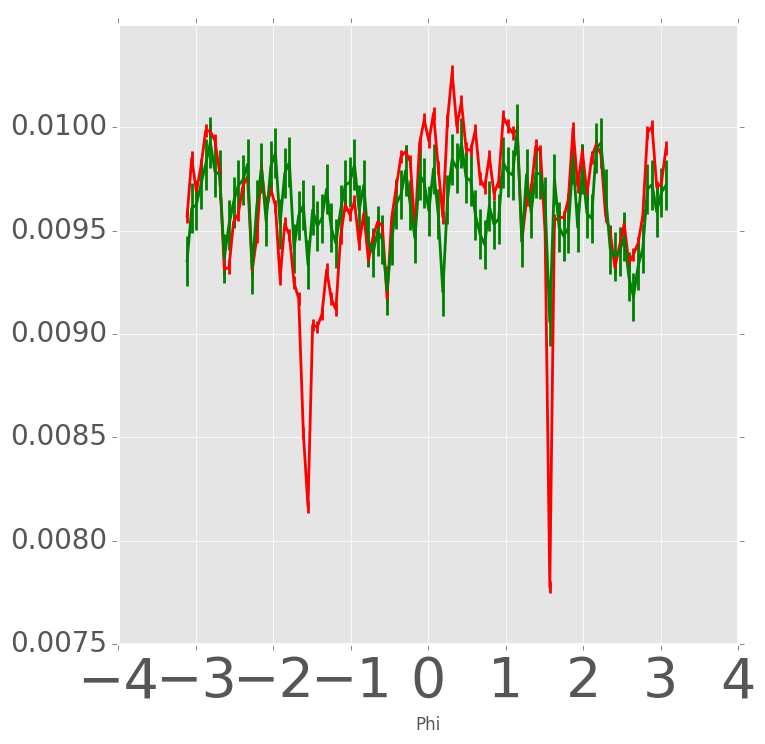

In [18]:
dfd=dfdata
dfm=dfmc
Xlist=["mass","ChIso03","ScEta","Pt","rho","Phi"]
for yvar in Xlist:
    if yvar=="ScEta": rv=np.arange(-2.5,2.5,0.03)
    if yvar=="Pt":rv=np.arange(20.0,80.0,0.2)
    if yvar=='rho':rv=np.arange(0.0,40.0,0.1)
    if yvar=="Phi":rv=np.arange(-3.14,3.14,0.06)
    if yvar=="mass":rv=np.arange(50.,150.,0.1)
    if yvar=="ChIso03":rv=np.arange(0.1,7.,0.02)
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    plot.plotHistErr(dfd[yvar], rv, Color="r", Weight=dfd["weight"])
    plot.plotHistErr(dfm[yvar], rv,Weight=dfm["weight"], Color="g")
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))

In [19]:
def WeightedPercentiles(df): 
        df.sort_values('y', inplace=True)
        cumsum = df.weight.cumsum()
        cutoff1 =df.weight.sum() * 0.5
        cutoff2 = df.weight.sum() * 0.16
        cutoff3 = df.weight.sum() * 0.84
        cutoff4 = df.weight.sum() * 0.25
        cutoff5 = df.weight.sum() * 0.75
        return df.y[cumsum >= cutoff1].min(), df.y[cumsum >= cutoff2].min(), df.y[cumsum >= cutoff3].min(),df.y[cumsum >= cutoff4].min(),df.y[cumsum >= cutoff5].min()     

def ProfileBox(x,y,nbins,xmin,xmax,ymin,ymax, ax, color,weight=1):
    if (type(weight) is int): weight=np.ones(len(x))
    df = DataFrame({'x' : x , 'y' : y, 'weight': weight})   
    binedges = xmin + ((xmax-xmin)/nbins) * np.arange(nbins+1)
    df['bin'] = np.digitize(df['x'],binedges) 
    bincenters = xmin + ((xmax-xmin)/nbins)*np.arange(nbins) + ((xmax-xmin)/(2*nbins))
    ProfileFrame = DataFrame({'bincenters' : bincenters, 'N' : df['bin'].value_counts(sort=False)},index=range(1,nbins+1))
    bins = ProfileFrame.index.values
    for bin in bins:
        y1=df.loc[df['bin']==bin,"y"].values
        y2=df.loc[df['bin']==bin,"weight"].values
        dfy = DataFrame({'y' : y1, 'weight': y2})   
        ProfileFrame.ix[bin,'Perc50'],ProfileFrame.ix[bin,'Perc16'],ProfileFrame.ix[bin,'Perc84'],ProfileFrame.ix[bin,'Perc25'],ProfileFrame.ix[bin,'Perc75']     = WeightedPercentiles(dfy)

    ProfileFrame['Perc50']      = ProfileFrame['Perc50'].fillna(0)
    ProfileFrame['Perc25']      = ProfileFrame['Perc25'].fillna(0)
    ProfileFrame['Perc75']      = ProfileFrame['Perc75'].fillna(0)
    ProfileFrame['Perc16']      = ProfileFrame['Perc16'].fillna(0)
    ProfileFrame['Perc84']      = ProfileFrame['Perc84'].fillna(0)

    ax.plot(ProfileFrame['bincenters'], ProfileFrame['Perc50'], color=color)
    ax.plot(ProfileFrame['bincenters'], ProfileFrame['Perc16'], color=color,lw=0.5)
    ax.plot(ProfileFrame['bincenters'], ProfileFrame['Perc84'], color=color,lw=0.5)
    ax.plot(ProfileFrame['bincenters'], ProfileFrame['Perc25'], color=color,lw=0.5,ls="--")
    ax.plot(ProfileFrame['bincenters'], ProfileFrame['Perc75'], color=color,lw=0.5,ls="--")
    ax.fill_between(ProfileFrame['bincenters'], ProfileFrame['Perc16'],ProfileFrame['Perc84'], facecolor=color,alpha=0.2)
    #ax.fill_between(ProfileFrame['bincenters'], ProfileFrame['Perc25'],ProfileFrame['Perc75'], facecolor=color,alpha=0.2)
    
    return ax

Hey!


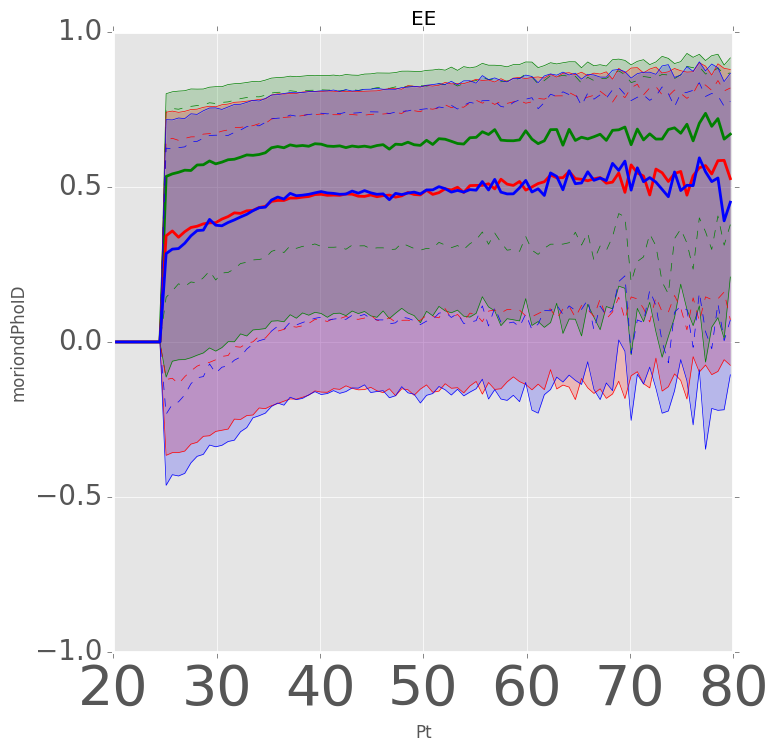

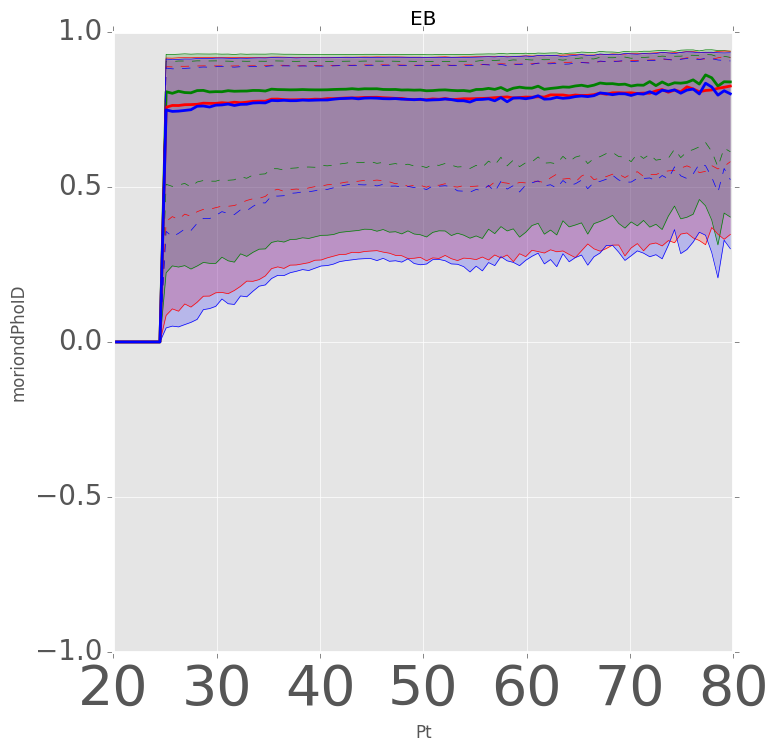

In [20]:
dfm=dfmcEE.query("moriondPhoID>-0.8")
dfd=dfEE.query("moriondPhoID>-0.8")
xvar="Pt"
yvar="moriondPhoID"
xmin,xmax=20.0,80.0
minY=-1
maxY=1
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax.set_xlabel(xvar)
ax.set_ylabel(yvar)
ax.set_title("EE")
ax.set_xlim(xmin,xmax)
ax.set_ylim(minY,maxY)
ProfileBox(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])

ProfileBox(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])

ProfileBox(dfm[xvar]  , dfm[yvar+'corrShowerShapes']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])
print "Hey!"
dfm=dfmcEB.query("moriondPhoID>-0.8")
dfd=dfEB.query("moriondPhoID>-0.8")
xvar="Pt"
yvar="moriondPhoID"
xmin,xmax=20.0,80.0
minY=-1
maxY=1
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax.set_xlabel(xvar)
ax.set_ylabel(yvar)
ax.set_title("EB")
ax.set_xlim(xmin,xmax)
ax.set_ylim(minY,maxY)
ProfileBox(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])

ProfileBox(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])

ProfileBox(dfm[xvar]  , dfm[yvar+'corrShowerShapes']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])

In [21]:
from copy import copy
def draw_data_mc(bins,data,mc,figsize=(8,6),var=None,logy=False,ratio=False,name="hey",
                **kwargs):
    
    mcstyle=dict(alpha=0.5,linewidth=0)
    mcstyle.update(kwargs)
    datastyle=copy(kwargs)
    datastyle["alpha"] = 1. # No transparency for data
    
    binw=bins[1]-bins[0]
    if ratio:
        fig, axes = plt.subplots(2,figsize=figsize,sharex=True,gridspec_kw = {'height_ratios':[3, 1]})
        top = axes[0]
        bottom = axes[1]
        fig.tight_layout()
    else:
        fig = plt.figure(figsize=figsize)
        axes = None
        top = plt
    
    # FIXME: assumes uniform binning
    xc = bins[1:]-binw*0.5
    
    #print mc
    for hist, style in mc:
        pkwargs = copy(mcstyle)
        pkwargs.update(style)
        top.plot(xc+binw*0.5,hist,**pkwargs)
    top.errorbar( xc+binw*0.5, data,ls='None', xerr=np.ones_like(data)*binw*0.5, yerr=np.sqrt(data), color='black', 
                 label='Data', fmt='o', **datastyle )
        
    if axes == None: axes = fig.axes
    
    if ratio:
        ratios = []
        for hist, style in mc:
            rdata = data / hist
            rdata_err = np.sqrt(data) / hist
            ratios.append((rdata,rdata_err))
            rkwargs = {}
            if len(mc) == 1: rkwargs['color'] = 'black'
            elif "color" in style: rkwargs['color'] = style['color']
            rkwargs.update(datastyle)
            bottom.errorbar( xc+binw*0.5, rdata,ls='None', xerr=np.ones_like(rdata)*binw*0.5, yerr=rdata_err, 
                        **rkwargs)
        
        bottom.plot( (bins[0],bins[-1]), (1,1), 'k-' )
        bottom.set_ylabel('Data / MC')
        bottom.set_ylim(0,2)
    
    if logy:
        axes[0].set_yscale('log')
    axes[0].set_xlim(bins[0],bins[-1])
    
    unit = None    
    if var != None:
        if type(var) != str:
            var, unit = var
        if unit: var += " (%s)" % unit
        axes[-1].set_xlabel(var)
    ylabel = 'Events / %1.3g' % binw
    if unit:
        ylabel += ' %s' % unit
    axes[0].set_ylabel(ylabel)

    top.legend(loc='best')
    plt.tight_layout()
    axes[0].set_title(name)
    fig.savefig('appendix/PhoID'+name+'.png', dpi=fig.dpi)

In [22]:
def exportToPdf(name='sample',section='sample',mode='a'):
    f = open('appendix/'+section+'.tex', mode)
    f.write('\\begin{minipage}{.5\\textwidth} \\centering')
    f.write('\\includegraphics[width=\\linewidth]{'+name+'.png} ')
    f.write('\\end{minipage}')
    f.close()

/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


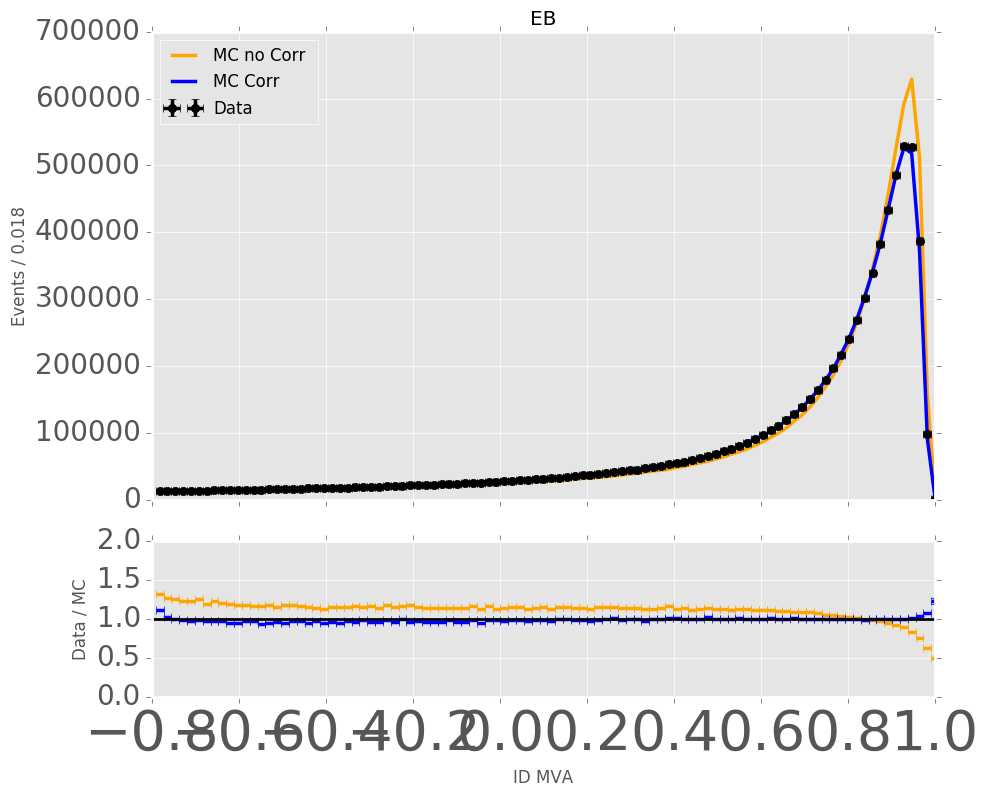

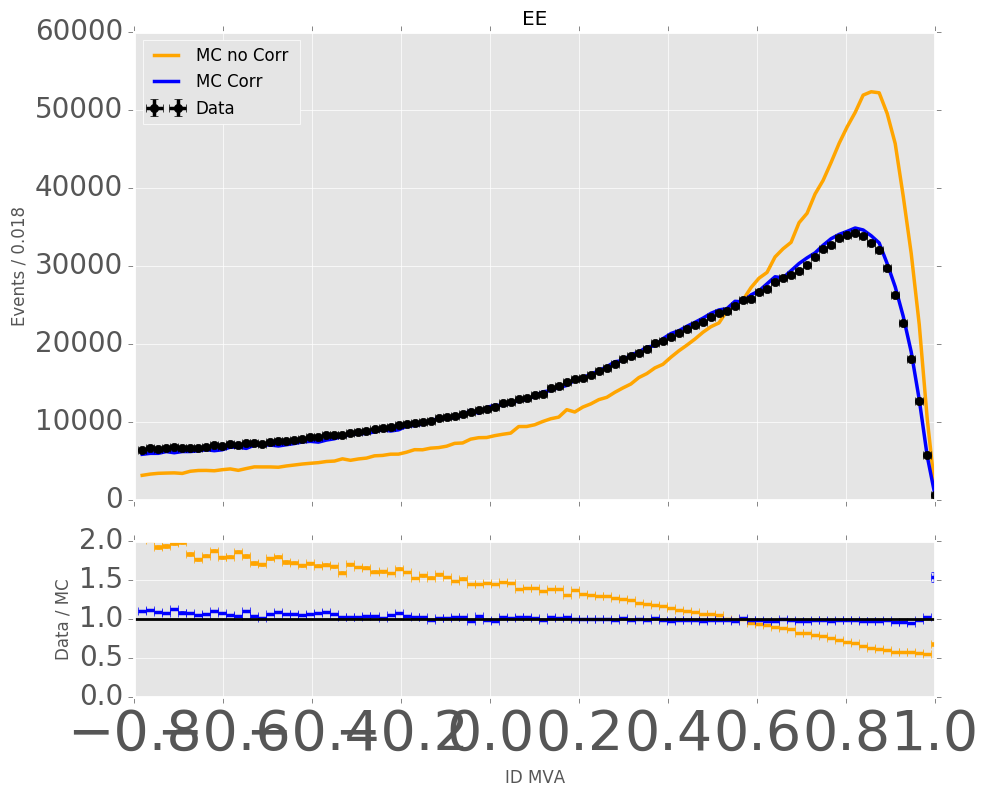

In [23]:
bins = np.linspace(-0.8,1,101)
var = 'moriondPhoID'
mclabels = [ '', 'corrShowerShapes']
mcstyles = [ dict(label='MC no Corr ',color='orange'),
             dict(label='MC Corr ',color='blue'), 
           ]
i=0
section="section5"
f = open('appendix/'+section+'.tex', "w")
f.write('\\subsection*{Photon ID} ')
f.write('\\begin{figure}[H] ')
f.write('\\centering')
f.close()
for dfs in [ (dfEB.query("moriondPhoID>-0.8"),dfmcEB.query("moriondPhoID>-0.8")), (dfEE.query("moriondPhoID>-0.8"),dfmcEE.query("moriondPhoID>-0.8")) ]: 
    i=i+1
    if i==1:name="EB"
    else: name="EE"
    data, mc = plot.data_mc(dfs[0],dfs[1],var,bins,weight="weight",mclabels=mclabels)
    draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8),name=name)
    name="PhoID"+name
    exportToPdf(name,section)
f = open('appendix/'+section+'.tex', "a")
f.write('\\end{figure} ')
f.close()

In [24]:
def WeightedPercentiles(df): 
        df.sort_values('y', inplace=True)
        cumsum = df.weight.cumsum()
        cutoff1 =df.weight.sum() * 0.5
        cutoff2 = df.weight.sum() * 0.16
        cutoff3 = df.weight.sum() * 0.84
        cutoff4 = df.weight.sum() * 0.25
        cutoff5 = df.weight.sum() * 0.75
        return df.y[cumsum >= cutoff1].min(), df.y[cumsum >= cutoff2].min(), df.y[cumsum >= cutoff3].min(),df.y[cumsum >= cutoff4].min(),df.y[cumsum >= cutoff5].min()     

def ProfileBox(x,y,nbins,xmin,xmax,ymin,ymax, ax, color,weight=1):
    if (type(weight) is int): weight=np.ones(len(x))
    df = DataFrame({'x' : x , 'y' : y, 'weight': weight})   
    binedges = xmin + ((xmax-xmin)/nbins) * np.arange(nbins+1)
    df['bin'] = np.digitize(df['x'],binedges) 
    bincenters = xmin + ((xmax-xmin)/nbins)*np.arange(nbins) + ((xmax-xmin)/(2*nbins))
    ProfileFrame = DataFrame({'bincenters' : bincenters, 'N' : df['bin'].value_counts(sort=False)},index=range(1,nbins+1))
    bins = ProfileFrame.index.values
    for bin in bins:
        y1=df.loc[df['bin']==bin,"y"].values
        y2=df.loc[df['bin']==bin,"weight"].values
        dfy = DataFrame({'y' : y1, 'weight': y2})   
        ProfileFrame.ix[bin,'Perc50'],ProfileFrame.ix[bin,'Perc16'],ProfileFrame.ix[bin,'Perc84'],ProfileFrame.ix[bin,'Perc25'],ProfileFrame.ix[bin,'Perc75']     = WeightedPercentiles(dfy)

    ProfileFrame['Perc50']      = ProfileFrame['Perc50'].fillna(0)
    ProfileFrame['Perc25']      = ProfileFrame['Perc25'].fillna(0)
    ProfileFrame['Perc75']      = ProfileFrame['Perc75'].fillna(0)
    ProfileFrame['Perc16']      = ProfileFrame['Perc16'].fillna(0)
    ProfileFrame['Perc84']      = ProfileFrame['Perc84'].fillna(0)

    ax.plot(ProfileFrame['bincenters'], ProfileFrame['Perc50'], color=color)
    #ax.plot(ProfileFrame['bincenters'], ProfileFrame['Perc16'], color=color,lw=0.5)
    #ax.plot(ProfileFrame['bincenters'], ProfileFrame['Perc84'], color=color,lw=0.5)
    ax.plot(ProfileFrame['bincenters'], ProfileFrame['Perc25'], color=color,lw=0.5)
    ax.plot(ProfileFrame['bincenters'], ProfileFrame['Perc75'], color=color,lw=0.5)
    ax.fill_between(ProfileFrame['bincenters'], ProfileFrame['Perc25'],ProfileFrame['Perc75'], facecolor=color,alpha=0.2)
    #ax.fill_between(ProfileFrame['bincenters'], ProfileFrame['Perc25'],ProfileFrame['Perc75'], facecolor=color,alpha=0.2)
    
    return ax

Pt
ScEta
rho
Phi


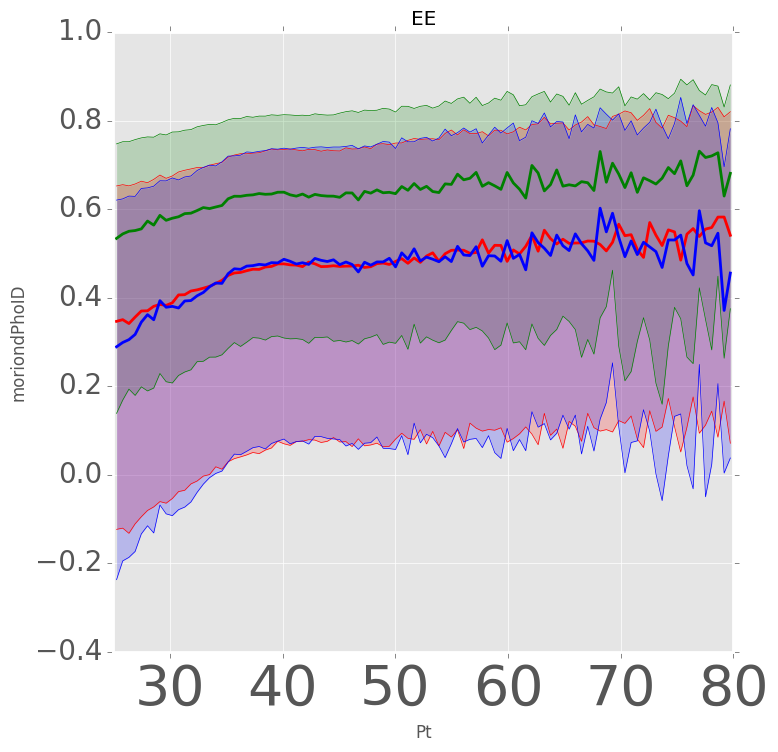

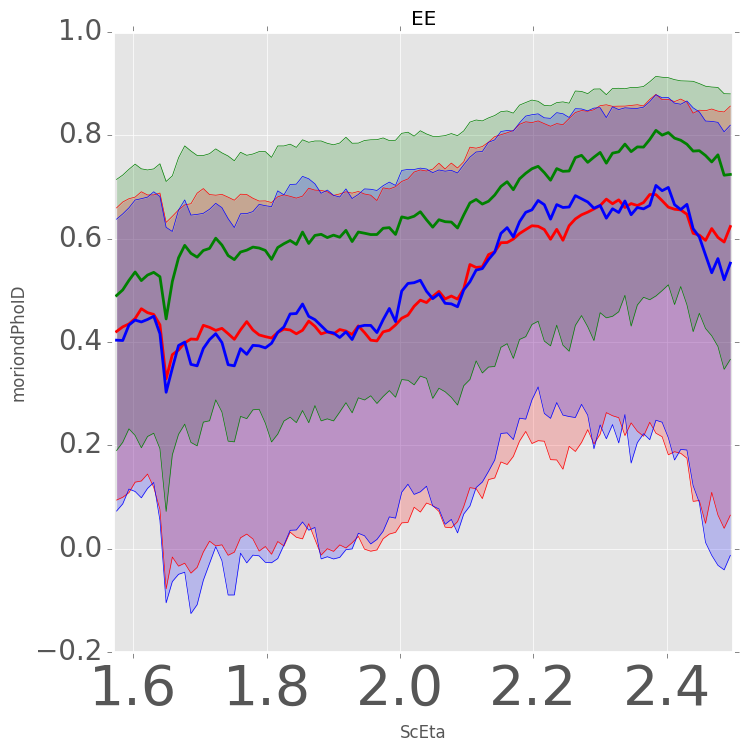

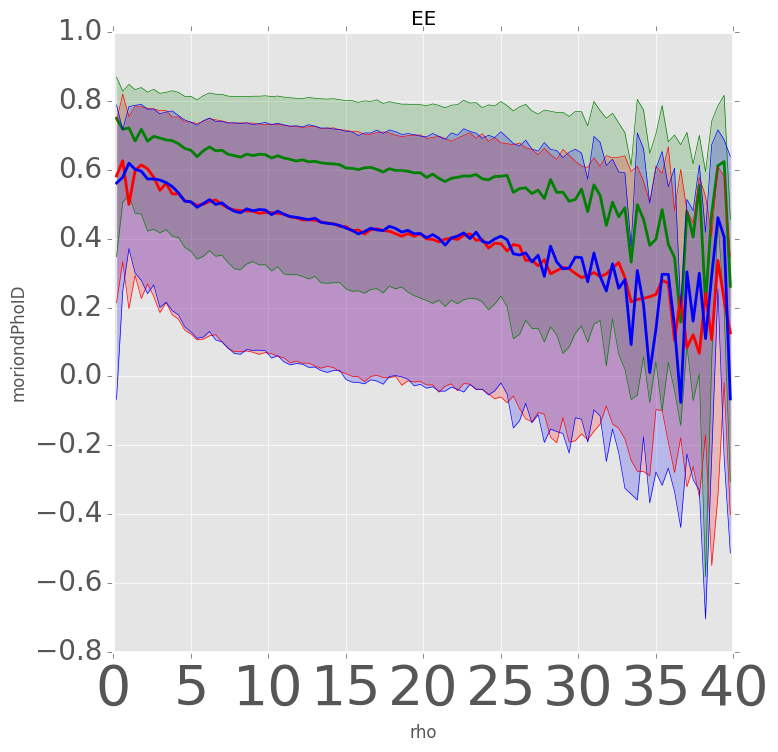

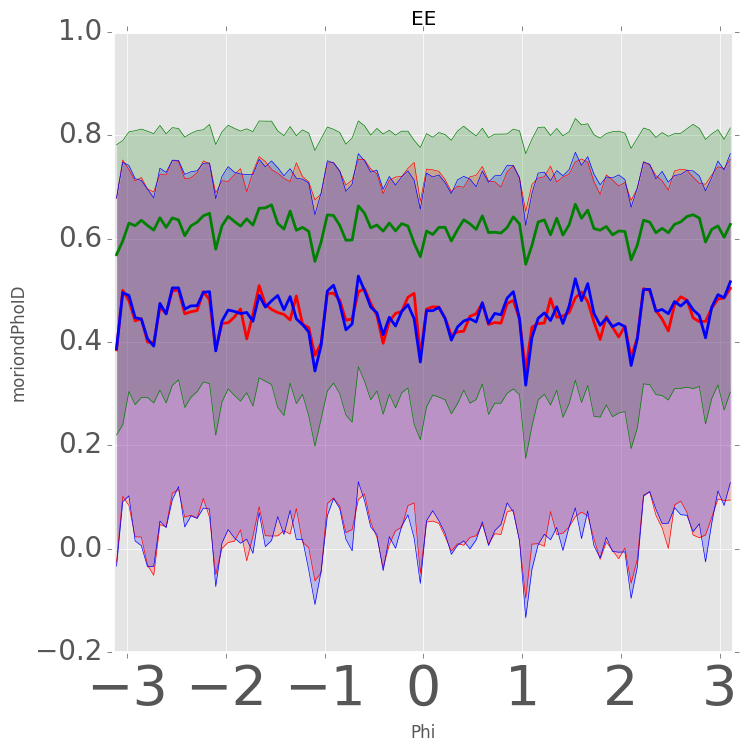

In [25]:
sec="EE"
dfm=dfmcEE.query("moriondPhoID>-0.8")
dfd=dfEE.query("moriondPhoID>-0.8")
Xlist=["Pt","ScEta","rho","Phi"]
section="section7"
f = open('appendix/'+section+'.tex', "w")
f.write('\\subsection*{Photon ID Profiles EE} ')
f.write('\\begin{figure}[H] ')
f.write('\\centering')
f.close()
for xvar in Xlist:
    print xvar
    if xvar=="ScEta":
        xmin,xmax= 1.57,2.5
    if xvar=="Pt":
        xmin,xmax=25.0,80.0
    if xvar=='rho':
        xmin,xmax=0.,40.
    if xvar=="Phi":
        xmin,xmax=-3.14,3.14
    yvar="moriondPhoID"
    minY=-1
    maxY=1
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)
    ax.set_title("EE")
    ax.set_xlim(xmin,xmax)
    #ax.set_ylim(minY,maxY)
    ProfileBox(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
    ProfileBox(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
    ProfileBox(dfm[xvar]  , dfm[yvar+'corrShowerShapes']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])
    fig.savefig('appendix/PhoIDvs'+str(xvar)+'EE.png', dpi=fig.dpi)
    exportToPdf('PhoIDvs'+str(xvar)+'EE',section)
    if i%2: 
        f = open('appendix/'+section+'.tex','a')
        f.write('\\end{figure}')
        f.write('\\begin{figure}[H]')
        f.close()
    i=i+1
f = open('appendix/'+section+'.tex', "a")
f.write('\\end{figure} ')
f.close() 

Pt
ScEta
rho
Phi


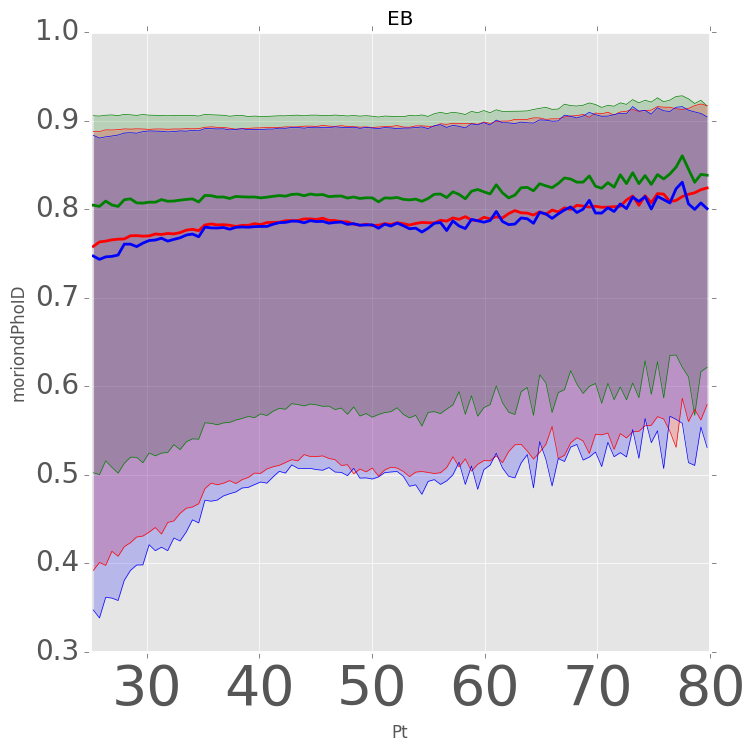

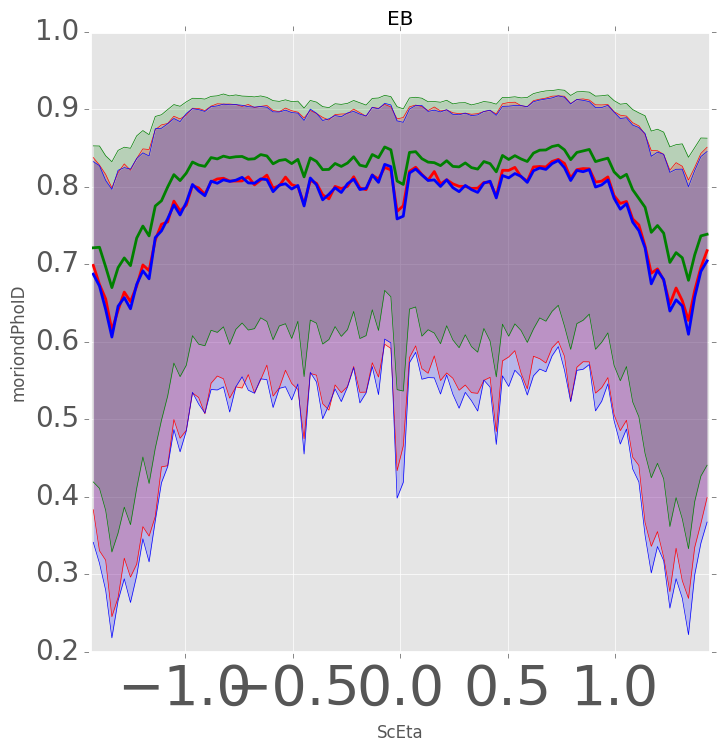

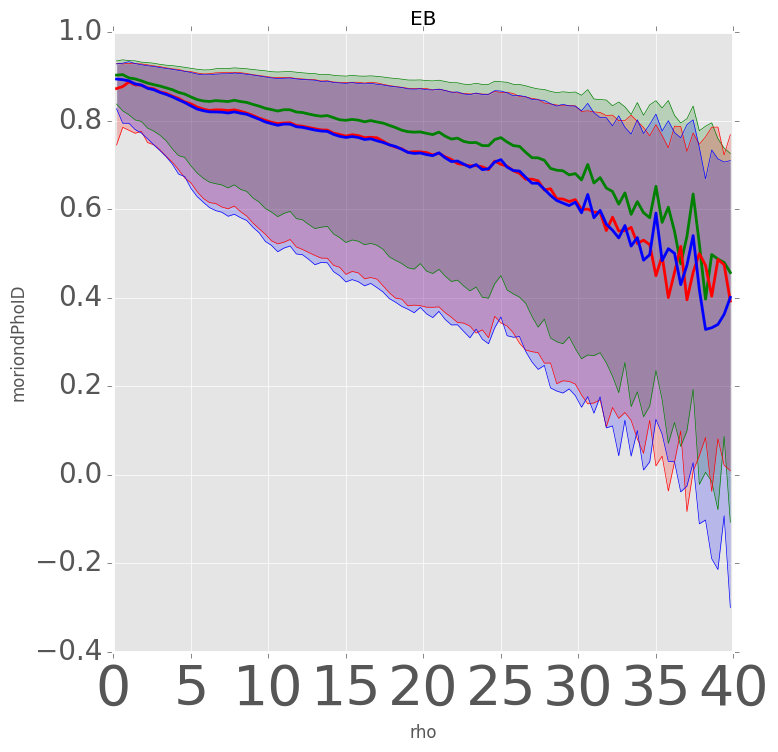

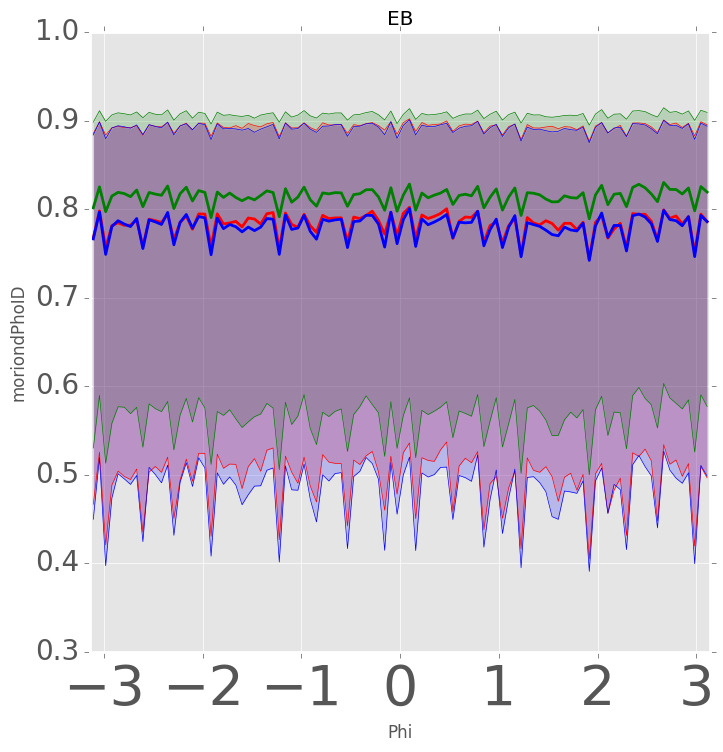

In [26]:
sec="EB"
dfm=dfmcEB.query("moriondPhoID>-0.8")
dfd=dfEB.query("moriondPhoID>-0.8")
Xlist=["Pt","ScEta","rho","Phi"]
section="section6"
f = open('appendix/'+section+'.tex', "w")
f.write('\\subsection*{Photon ID Profiles EB} ')
f.write('\\begin{figure}[H] ')
f.write('\\centering')
f.close()
Xlist=["Pt","ScEta","rho","Phi"]
i=0
for xvar in Xlist:
    print xvar
    if xvar=="ScEta":
        xmin,xmax= -1.44,1.44
    if xvar=="Pt":
        xmin,xmax=25.0,80.0
    if xvar=='rho':
        xmin,xmax=0.,40.
    if xvar=="Phi":
        xmin,xmax=-3.14,3.14
    yvar="moriondPhoID"
    minY=-1
    maxY=1
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)
    ax.set_title("EB")
    ax.set_xlim(xmin,xmax)
    #ax.set_ylim(minY,maxY)
    ProfileBox(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
    ProfileBox(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
    ProfileBox(dfm[xvar]  , dfm[yvar+'corrShowerShapes']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])
    fig.savefig('appendix/PhoIDvs'+str(xvar)+'EB.png', dpi=fig.dpi)
    exportToPdf('PhoIDvs'+str(xvar)+'EB',section)
    if i%2: 
        f = open('appendix/'+section+'.tex','a')
        f.write('\\end{figure}')
        f.write('\\begin{figure}[H]')
        f.close()
    i=i+1
f = open('appendix/'+section+'.tex', "a")
f.write('\\end{figure} ')
f.close()    